# Bolívar Conmigo
## Análisis de la aplicación

### Importación de Librerías y Datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm


In [4]:
file_path = "Datos_Caso_2025.xlsx"

df_demo = pd.read_excel(file_path, sheet_name = "Datos Demográficos") # Datos Demográficos
df_int = pd.read_excel(file_path, sheet_name = "Datos Interacciones") # Datos de Interacción

### EDA

<div class="alert alert-block alert-success">
<b>Datos Demográficos</b> <a class=“tocSkip”></a>

</div>

In [7]:
df_demo.shape

(2764, 13)

In [8]:
df_demo.head()

,id,Genero,Fec_Nacimiento,Estad_Civil,Ingresos,Act_Economica,Educacion,Persona_Cargo,Num_Hijos,prod_seguros,Salud,Vida,Autos
0,0,FEMENINO,1975-03-18T00:00:00Z,CASADO,7964819.0,EMPLEADO,NaN,NaN,NaN,1,0,0,0.0
1,1,MASCULINO,1982-08-30T00:00:00Z,CASADO,3911901.0,ESTUDIANTE,NaN,NaN,3.0,2,0,0,1.0
2,2,MASCULINO,1984-12-31T00:00:00Z,CASADO,8000000.0,INDEPENDIENTE,NaN,NaN,2.0,7,0,0,1.0
3,3,MASCULINO,1972-11-30T00:00:00Z,SOLTERO,4236686.0,EMPLEADO,NaN,NaN,NaN,0,0,0,0.0
4,4,MASCULINO,1961-12-10T00:00:00Z,CASADO,7642931.0,EMPLEADO,NaN,NaN,NaN,1,0,0,0.0


In [9]:
df_demo.describe(include = "all")

,id,Genero,Fec_Nacimiento,Estad_Civil,Ingresos,Act_Economica,Educacion,Persona_Cargo,Num_Hijos,prod_seguros,Salud,Vida,Autos
count,2764.000000,2725,2360,2003,2.645000e+03,1684,0.0,31.000000,1241.000000,2764.000000,2764.000000,2764.000000,2264.000000
unique,NaN,3,2069,8,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,MASCULINO,1970-01-01T00:00:00Z,SOLTERO,NaN,EMPLEADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1312,60,963,NaN,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1381.500000,NaN,NaN,NaN,4.830286e+06,NaN,NaN,1.580645,0.620467,1.477569,0.103473,0.054993,0.271201
std,798.042397,NaN,NaN,NaN,6.002592e+06,NaN,NaN,0.764818,1.000097,2.037613,0.316289,0.274136,0.498111
min,0.000000,NaN,NaN,NaN,4.534200e+04,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,690.750000,NaN,NaN,NaN,1.739898e+06,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1381.500000,NaN,NaN,NaN,2.835172e+06,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2072.250000,NaN,NaN,NaN,5.604167e+06,NaN,NaN,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000


In [10]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2764 non-null   int64  
 1   Genero          2725 non-null   object 
 2   Fec_Nacimiento  2360 non-null   object 
 3   Estad_Civil     2003 non-null   object 
 4   Ingresos        2645 non-null   float64
 5   Act_Economica   1684 non-null   object 
 6   Educacion       0 non-null      float64
 7   Persona_Cargo   31 non-null     float64
 8   Num_Hijos       1241 non-null   float64
 9   prod_seguros    2764 non-null   int64  
 10  Salud           2764 non-null   int64  
 11  Vida            2764 non-null   int64  
 12  Autos           2264 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 280.8+ KB


In [11]:
# Porcentaje de datos faltanes
df_demo.isna().sum()/len(df_demo)*100

id                  0.000000
Genero              1.410999
Fec_Nacimiento     14.616498
Estad_Civil        27.532562
Ingresos            4.305355
Act_Economica      39.073806
Educacion         100.000000
Persona_Cargo      98.878437
Num_Hijos          55.101302
prod_seguros        0.000000
Salud               0.000000
Vida                0.000000
Autos              18.089725
dtype: float64

In [12]:
# Filas duplicadas
df_demo.duplicated().sum()

0

El dataset demográfico cuenta con **2763 usuarios y 13 variables** sin datos duplicados. Las columnas relacionadas con productos de seguros se encuentran completas, mientras que la columna *Educación* carece totalmente de datos, por lo cual será eliminada. La variable *Persona_Cargo* solo registra información en el 2% de los casos, lo que amerita revisar si los valores nulos representan ausencia de personas a cargo antes de decidir su eliminación. El resto de variables presenta entre **1.41% y 55.1% de datos faltantes**, por lo que será necesario analizar la distribución y los patrones de los valores de cada columna para definir el tratamiento adecuado.


In [14]:
df_demo.drop(columns=["Educacion"], inplace = True)

<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Genero
</span>

In [16]:
df_demo["Genero"].unique()

array(['FEMENINO', 'MASCULINO', nan, 'NO INFO'], dtype=object)

In [17]:
df_demo["Genero"].value_counts()

Genero
MASCULINO    1312
FEMENINO     1087
NO INFO       326
Name: count, dtype: int64

In [18]:
df_demo["Genero"].isna().sum()

39

In [19]:
df_demo["Genero"] = df_demo["Genero"].replace("NO INFO", np.nan)
df_demo["Genero"].value_counts()

Genero
MASCULINO    1312
FEMENINO     1087
Name: count, dtype: int64

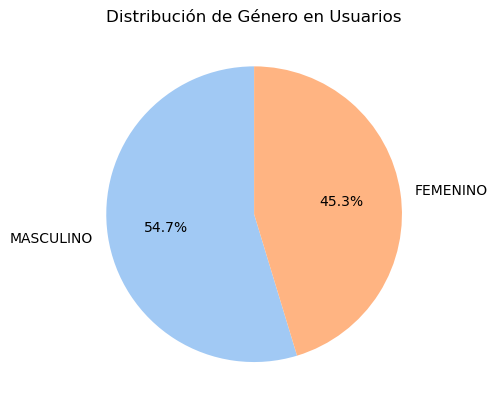

In [20]:
colors = sns.color_palette("pastel")[0:len(df_demo["Genero"].value_counts())]

plt.pie(df_demo["Genero"].value_counts(), 
    labels = df_demo["Genero"].value_counts().index, 
    autopct = '%1.1f%%', 
    startangle = 90,
    colors = colors)

plt.title("Distribución de Género en Usuarios")
plt.show()


In [21]:
# Relación M:F
df_demo["Genero"].value_counts().iloc[0]/df_demo["Genero"].value_counts().iloc[1]

1.2069917203311868

La mayoría de los usuarios corresponde al género masculino, con una relación de **1.2:1** frente al femenino, mientras que aproximadamente el **13%** de los usuarios carece de información registrada sobre esta característica

<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Fec_Nacimiento
</span>

In [24]:
df_demo["Fec_Nacimiento"].isna().sum()

404

In [25]:
# Convertir a formato datetime
df_demo["Fec_Nacimiento"] = pd.to_datetime(df_demo["Fec_Nacimiento"], errors="coerce")
df_demo["Fec_Nacimiento"].head()

0   1975-03-18 00:00:00+00:00
1   1982-08-30 00:00:00+00:00
2   1984-12-31 00:00:00+00:00
3   1972-11-30 00:00:00+00:00
4   1961-12-10 00:00:00+00:00
Name: Fec_Nacimiento, dtype: datetime64[ns, UTC]

In [26]:
# Año de Nacimiento
df_demo["Ano_Nacimiento"] = df_demo["Fec_Nacimiento"].dt.year.astype("Int64")
print(df_demo[["Fec_Nacimiento", "Ano_Nacimiento"]].head())

             Fec_Nacimiento  Ano_Nacimiento
0 1975-03-18 00:00:00+00:00            1975
1 1982-08-30 00:00:00+00:00            1982
2 1984-12-31 00:00:00+00:00            1984
3 1972-11-30 00:00:00+00:00            1972
4 1961-12-10 00:00:00+00:00            1961


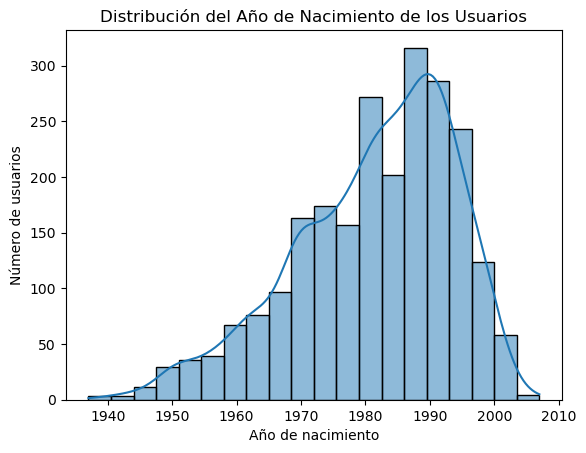

In [27]:

sns.histplot(
    data = df_demo, 
    x = "Ano_Nacimiento", 
    bins = 20, 
    kde = True)


plt.title("Distribución del Año de Nacimiento de los Usuarios")
plt.xlabel("Año de nacimiento")
plt.ylabel("Número de usuarios")
plt.show()

In [28]:
df_demo["Ano_Nacimiento"].describe()

count        2360.0
mean     1981.27839
std       12.385467
min          1937.0
25%          1973.0
50%          1983.0
75%          1991.0
max          2007.0
Name: Ano_Nacimiento, dtype: Float64

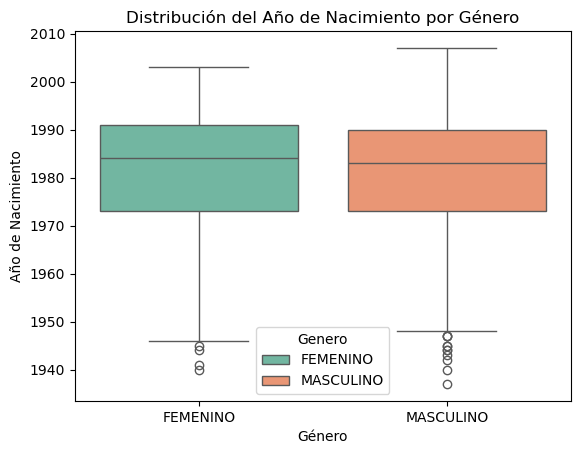

In [29]:
sns.boxplot(
    data = df_demo,
    x = "Genero",
    y = "Ano_Nacimiento",
    palette = "Set2",
    hue = "Genero")

plt.title("Distribución del Año de Nacimiento por Género")
plt.xlabel("Género")
plt.ylabel("Año de Nacimiento")
plt.show()

La distribución de fecha de nacimiento indica que la mayoría de los usuarios nació entre 1970 y 1995, lo que corresponde a un rango de **25 a 50 años en el momento del lanzamiento de la app en 2022**. Más adelante, con los datos de interacción, será posible calcular la edad exacta de cada usuario. No se observan diferencias significativas en la distribución de años de nacimiento al considerar el género.


<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Estad_Civil
</span>

In [32]:
df_demo["Estad_Civil"].unique()

array(['CASADO', 'SOLTERO', 'UNION LIBRE', 'UNION ALL LIBRE', nan,
       'SEPARADO', 0, 'DIVORCIADO', 'VIUDO'], dtype=object)

In [33]:
df_demo["Estad_Civil"].value_counts()

Estad_Civil
SOLTERO            963
CASADO             606
UNION ALL LIBRE    198
0                  133
UNION LIBRE         42
SEPARADO            26
DIVORCIADO          19
VIUDO               16
Name: count, dtype: int64

In [34]:
# Unificar términos
df_demo["Estad_Civil"] = df_demo["Estad_Civil"].replace(
    {"UNION ALL LIBRE": "UNION LIBRE",
     0: np.nan})

df_demo["Estad_Civil"].value_counts()

Estad_Civil
SOLTERO        963
CASADO         606
UNION LIBRE    240
SEPARADO        26
DIVORCIADO      19
VIUDO           16
Name: count, dtype: int64

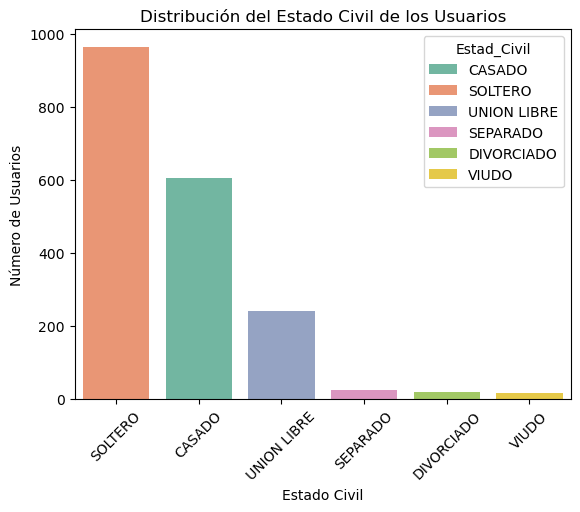

In [35]:
sns.countplot(data = df_demo,
              x = "Estad_Civil",
              order = df_demo["Estad_Civil"].value_counts().index,
              palette = "Set2",
              hue = "Estad_Civil")

plt.title("Distribución del Estado Civil de los Usuarios")
plt.xlabel("Estado Civil")
plt.ylabel("Número de Usuarios")
plt.xticks(rotation = 45)
plt.show()

La mayoría de los usuarios se encuentra en estado soltero, seguido por los casados y aquellos que viven en unión libre. Un grupo reducido corresponde a usuarios separados, divorciados o viudos, mientras que aproximadamente el **27%** no cuenta con información registrada sobre su estado civil.

<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Ingresos
</span>

In [38]:
df_demo["Ingresos"].isna().sum()

119

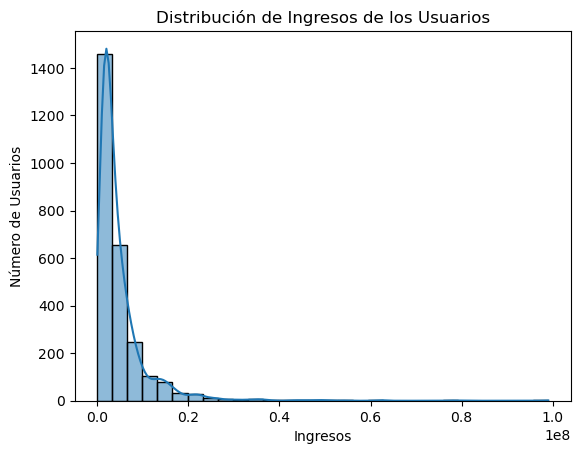

In [39]:
sns.histplot(data = df_demo,
             x = "Ingresos",
             bins = 30,
             kde = True)

plt.title("Distribución de Ingresos de los Usuarios")
plt.xlabel("Ingresos")
plt.ylabel("Número de Usuarios")
plt.show()

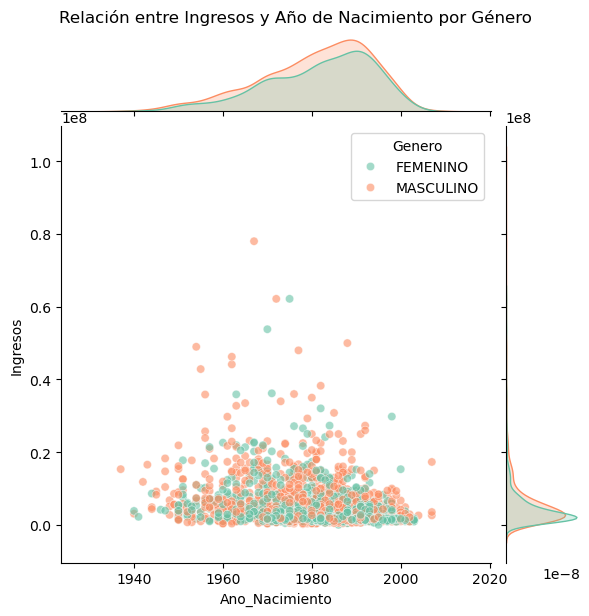

In [40]:
g = sns.jointplot(data = df_demo, 
                  x = "Ano_Nacimiento", 
                  y = "Ingresos",
                  hue = "Genero",
                  kind = "scatter", 
                  palette = "Set2", 
                  alpha = 0.6)

g.fig.suptitle("Relación entre Ingresos y Año de Nacimiento por Género", y = 1.02)
plt.show()

In [41]:
# Correlación
df_demo["Ano_Nacimiento"].corr(df_demo["Ingresos"])

-0.26712784109422516

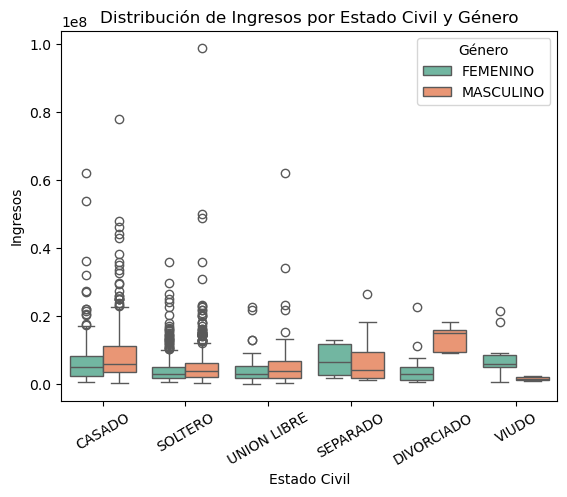

In [42]:
sns.boxplot(data = df_demo,
            x = "Estad_Civil",
            y = "Ingresos",
            hue = "Genero",
            palette = "Set2")

plt.title("Distribución de Ingresos por Estado Civil y Género")
plt.xlabel("Estado Civil")
plt.ylabel("Ingresos")
plt.xticks(rotation=30)
plt.legend(title="Género")
plt.show()

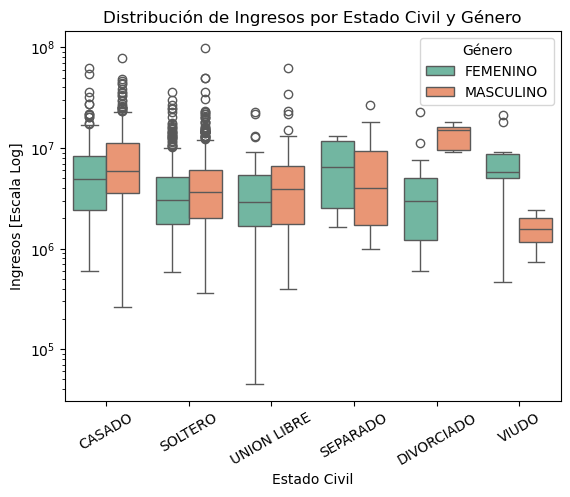

In [43]:
# Box Plot Escala Log
sns.boxplot(data = df_demo,
            x = "Estad_Civil",
            y = "Ingresos",
            hue = "Genero",
            palette = "Set2")


plt.yscale("log")
plt.title("Distribución de Ingresos por Estado Civil y Género")
plt.xlabel("Estado Civil")
plt.ylabel("Ingresos [Escala Log]")
plt.xticks(rotation=30)
plt.legend(title="Género")
plt.show()

Se observa una **correlación negativa débil entre el año de nacimiento y los ingresos**, lo que sugiere un ligero incremento de ingresos en personas de mayor edad. Asimismo, las **mujeres viudas y separadas** presentan ingresos superiores en comparación con los hombres.


<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Act_Economica
</span>

In [46]:
df_demo["Act_Economica"].unique()

array(['EMPLEADO', 'ESTUDIANTE', 'INDEPENDIENTE', nan, 'PENSIONADO',
       'SOCIO / RENTISTA DE CAPITAL', 'SERVIDOR PUBLICO', 'AMA DE CASA',
       'NO TIENE'], dtype=object)

In [47]:
df_demo["Act_Economica"].value_counts()

Act_Economica
EMPLEADO                       1269
INDEPENDIENTE                   315
PENSIONADO                       57
ESTUDIANTE                       29
SERVIDOR PUBLICO                  8
AMA DE CASA                       3
SOCIO / RENTISTA DE CAPITAL       2
NO TIENE                          1
Name: count, dtype: int64

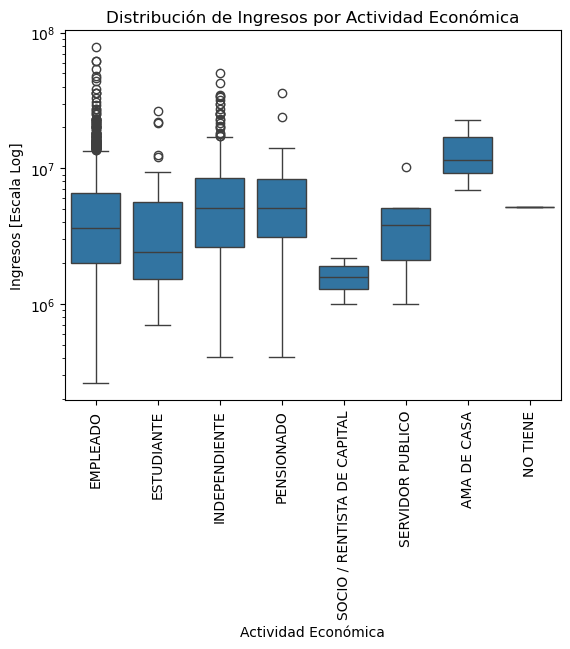

In [48]:
# Box Plot Escala Log
sns.boxplot(data = df_demo,
            x = "Act_Economica",
            y = "Ingresos")


plt.yscale("log")
plt.title("Distribución de Ingresos por Actividad Económica")
plt.xlabel("Actividad Económica")
plt.ylabel("Ingresos [Escala Log]")
plt.xticks(rotation = 90)
plt.show()

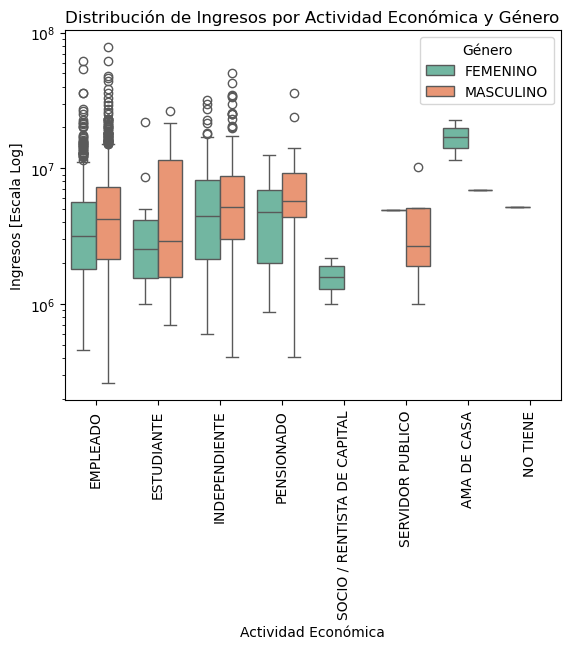

In [49]:
# Box Plot Escala Log
sns.boxplot(data = df_demo,
            x = "Act_Economica",
            y = "Ingresos",
            hue = "Genero",
            palette = "Set2")


plt.yscale("log")
plt.title("Distribución de Ingresos por Actividad Económica y Género")
plt.xlabel("Actividad Económica")
plt.ylabel("Ingresos [Escala Log]")
plt.xticks(rotation = 90)
plt.legend(title="Género")
plt.show()

Como era de esperarse, los **usuarios empleados, independientes y pensionados** son quienes registran los mayores ingresos. En términos generales, los **hombres presentan un nivel de ingresos superior al de las mujeres**.


<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Persona_Cargo
</span>

In [52]:
df_demo["Persona_Cargo"].unique()

array([nan,  3.,  1.,  2.,  0.])

In [53]:
df_demo["Persona_Cargo"].value_counts()

Persona_Cargo
1.0    15
2.0    11
3.0     4
0.0     1
Name: count, dtype: int64

La columna *Persona_Cargo* cuenta únicamente con 31 registros válidos. Aunque inicialmente se consideró que los valores nulos podrían representar “0”, este valor también aparece explícitamente en los datos. Dado el bajo nivel de completitud, se decidió eliminar la columna del análisis.

In [55]:
df_demo.drop(columns = ["Persona_Cargo"], inplace = True)

<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Num_Hijos
</span>

In [57]:
df_demo["Num_Hijos"].unique()

array([nan,  3.,  2.,  0.,  1.,  4.,  5.,  6.,  8.])

In [58]:
df_demo["Num_Hijos"] = df_demo["Num_Hijos"].astype("Int64")

In [59]:
df_demo["Num_Hijos"].value_counts()

Num_Hijos
0    808
1    187
2    182
3     48
4     10
5      3
6      2
8      1
Name: count, dtype: Int64

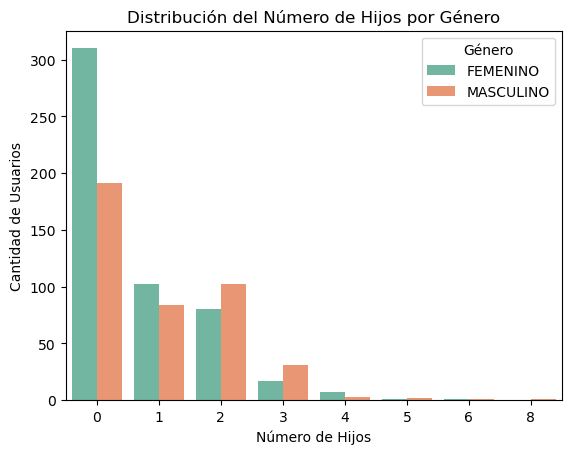

In [60]:
sns.countplot(data = df_demo,
              x = "Num_Hijos",
              hue = "Genero",
              palette = "Set2")

plt.title("Distribución del Número de Hijos por Género")
plt.xlabel("Número de Hijos")
plt.ylabel("Cantidad de Usuarios")
plt.legend(title = "Género")
plt.show()

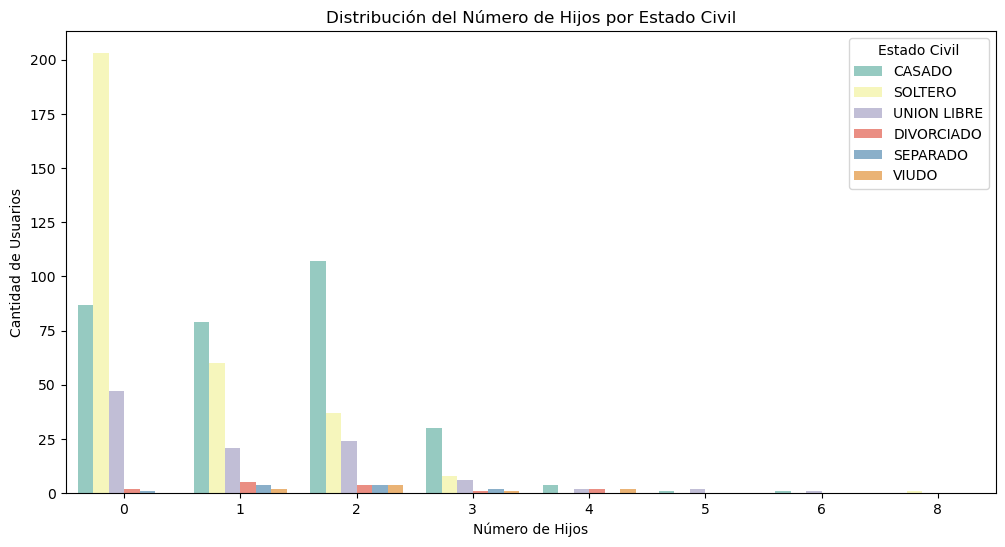

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_demo,
              x = "Num_Hijos",
              hue = "Estad_Civil",
              palette = "Set3")

plt.title("Distribución del Número de Hijos por Estado Civil")
plt.xlabel("Número de Hijos")
plt.ylabel("Cantidad de Usuarios")
plt.legend(title = "Estado Civil")
plt.show()

La mayoría de usuarios, tanto hombres como mujeres, no tiene hijos, aunque esta condición es más prevalente en el género femenino. La proporción de **solteros sin hijos** resulta significativa, mientras que los **usuarios casados suelen tener entre 1 y 2 hijos**, aunque un número considerable de ellos no tienen hijos


<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Análisis datos de Seguros
</span>


In [64]:
def analizar_seguro(columna):

    """
    Función para analizar la relación de un producto (columna) 
    con variables demográficas.
    
    Parámetros:
    columna (str): nombre de la columna a analizar 
    """
    
    # 1. Valores únicos y conteo
    print(f"Valores únicos en {columna}:")
    print(df_demo[columna].unique())
    print("Conteo de valores:")
    print(df_demo[columna].value_counts())
    
    # 2. Boxplot Año de Nacimiento vs producto
    plt.figure(figsize=(10,6))
    sns.boxplot(data = df_demo, x = columna, y = "Ano_Nacimiento")
    plt.title(f"Distribución del Año de Nacimiento según {columna}")
    plt.xlabel(f"Productos: {columna}")
    plt.ylabel("Año de Nacimiento")
    plt.show()
    
    # 3. Countplot por Género
    plt.figure(figsize=(10,6))
    sns.countplot(data = df_demo, x = columna, hue = "Genero", palette = "Set2")
    plt.title(f"Distribución de {columna} por Género")
    plt.xlabel(f"Productos: {columna}")
    plt.ylabel("Cantidad de Usuarios")
    plt.legend(title = "Género")
    plt.show()
    
    # 4. Countplot por Estado Civil
    plt.figure(figsize=(12,6))
    sns.countplot(data = df_demo, x = columna, hue = "Estad_Civil", palette = "Set2")
    plt.title(f"Distribución de {columna} por Estado Civil")
    plt.xlabel(f"Productos: {columna}")
    plt.ylabel("Cantidad de Usuarios")
    plt.legend(title = "Estado Civil")
    plt.show()
    
    # 5. Countplot por Actividad Económica
    plt.figure(figsize=(12,6))
    sns.countplot(data = df_demo, x = columna, hue = "Act_Economica", palette = "Set2")
    plt.title(f"Distribución de {columna} por Actividad Económica")
    plt.xlabel(f"Productos: {columna}")
    plt.ylabel("Cantidad de Usuarios")
    plt.legend(title = "Actividad Económica")
    plt.show()

Valores únicos en prod_seguros:
[ 1  2  7  0  4  6  3  5  8 10  9 13 11 12 14]
Conteo de valores:
prod_seguros
0     1120
1      753
2      365
3      168
4      119
5       79
6       55
7       39
8       21
9       17
10      15
11       8
13       2
12       2
14       1
Name: count, dtype: int64


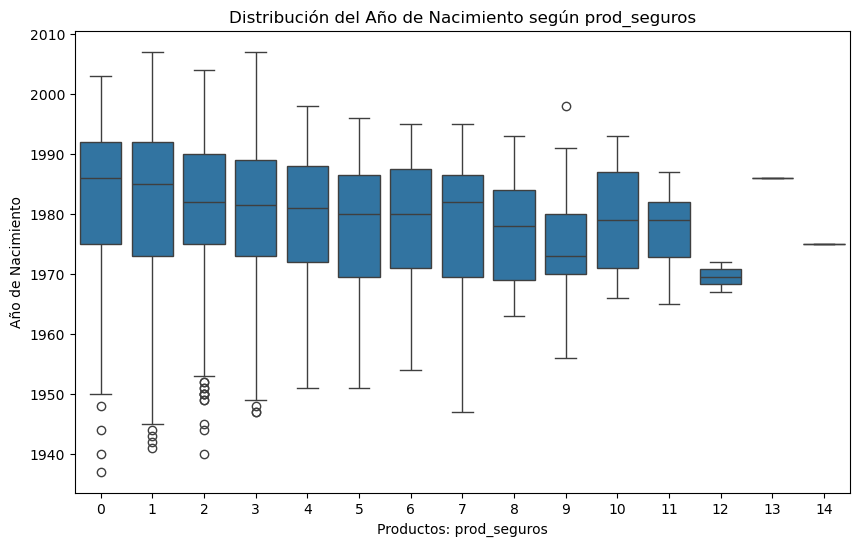

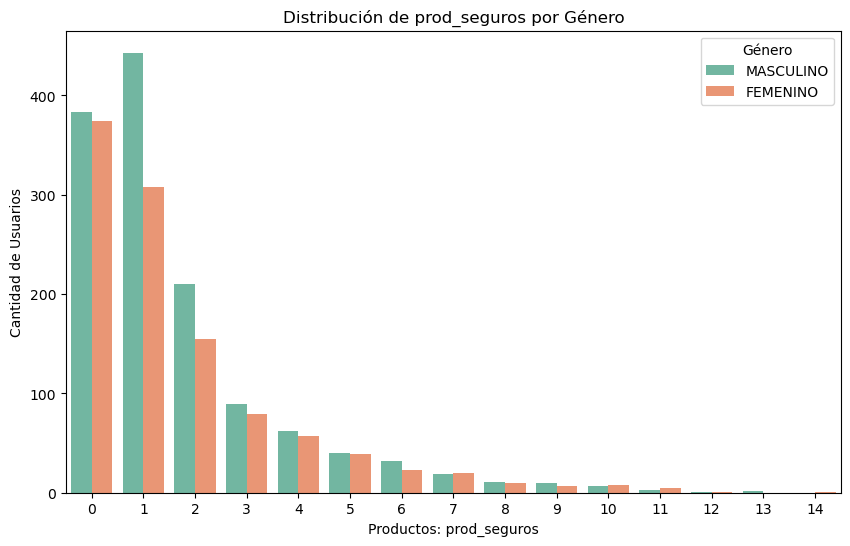

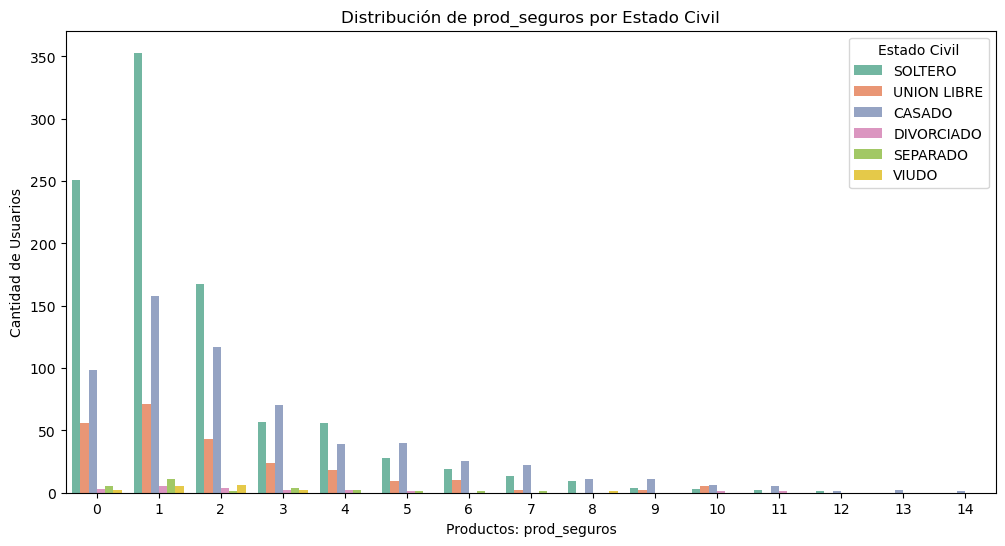

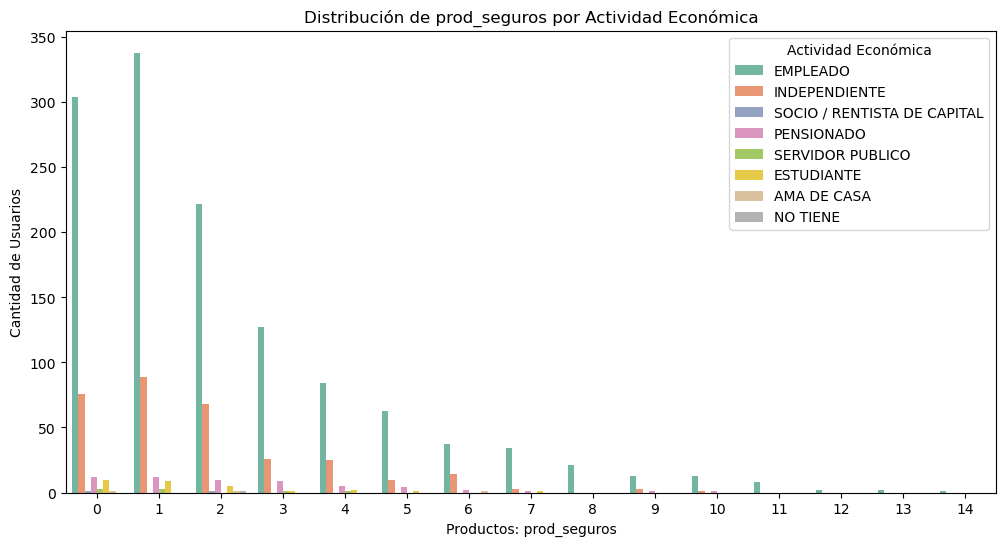

In [65]:
analizar_seguro("prod_seguros")

Valores únicos en Salud:
[0 1 2 4]
Conteo de valores:
Salud
0    2485
1     274
2       4
4       1
Name: count, dtype: int64


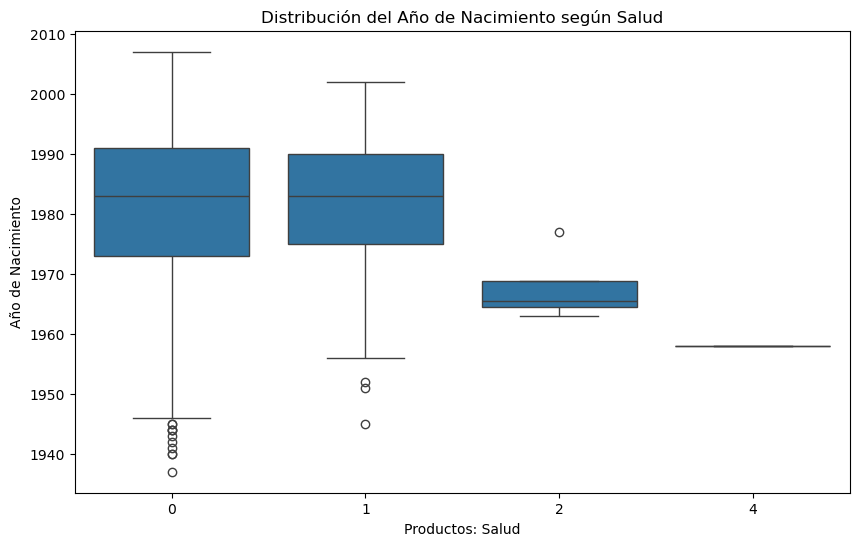

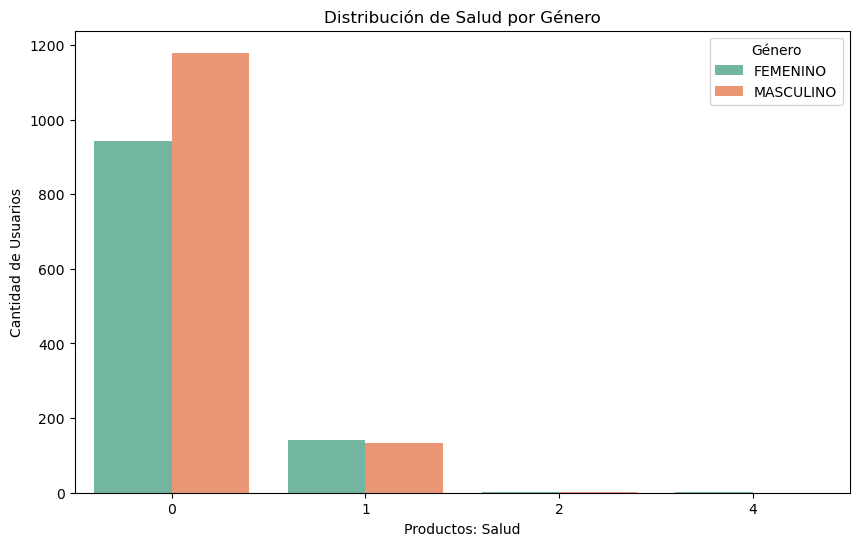

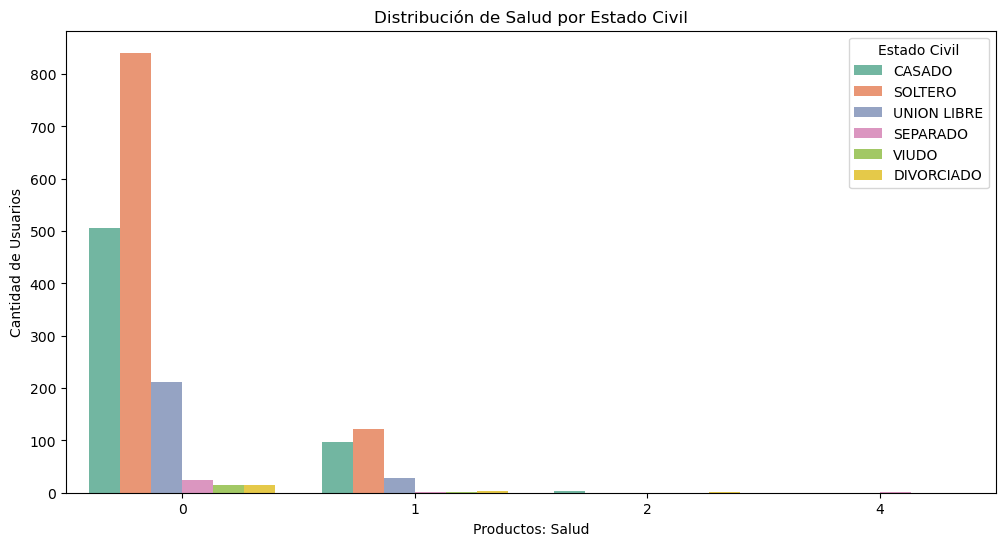

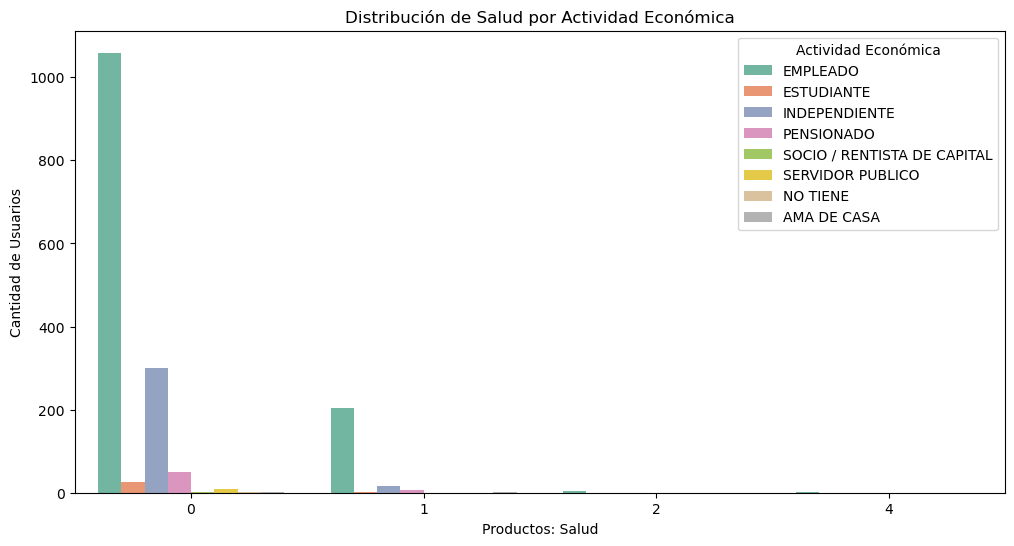

In [66]:
analizar_seguro("Salud")

Valores únicos en Vida:
[0 1 2 3 4]
Conteo de valores:
Vida
0    2638
1     105
2      17
3       3
4       1
Name: count, dtype: int64


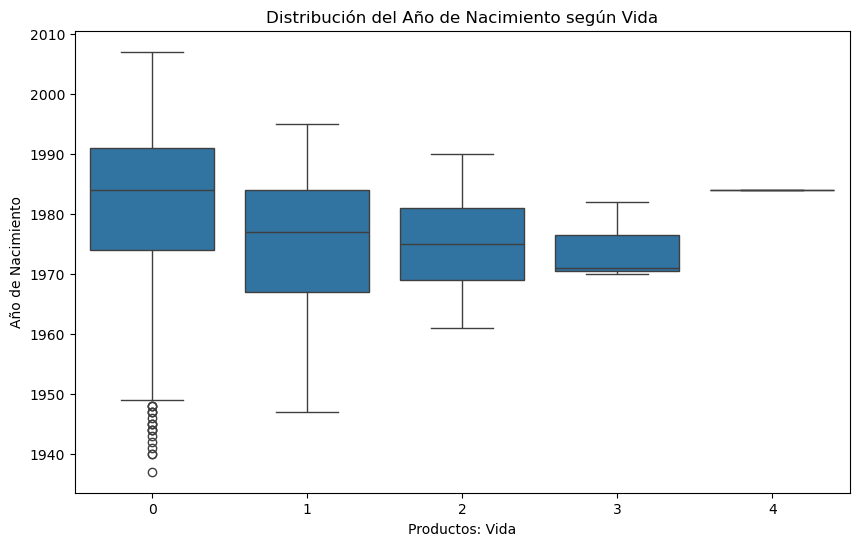

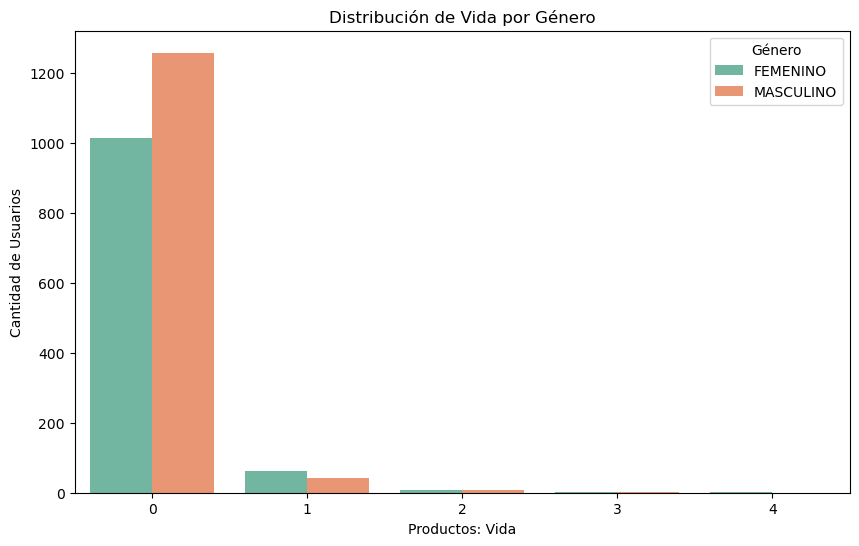

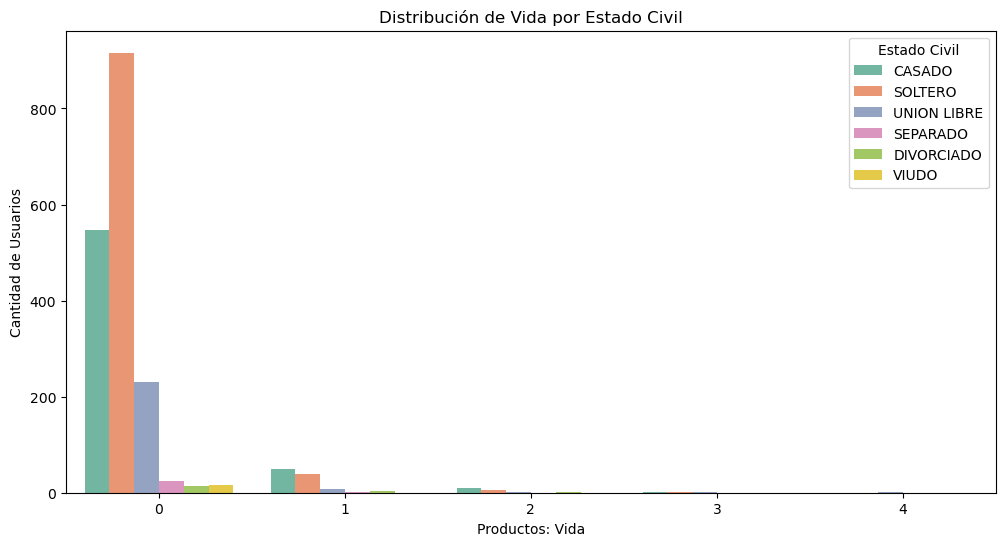

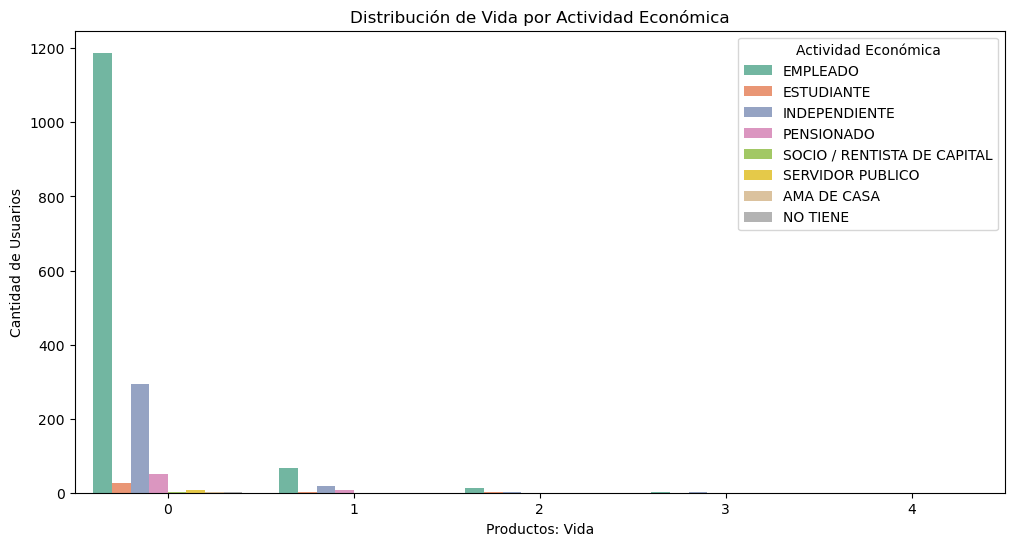

In [67]:
analizar_seguro("Vida")

Valores únicos en Autos:
[ 0.  1.  2.  4.  3. nan]
Conteo de valores:
Autos
0.0    1701
1.0     517
2.0      42
3.0       3
4.0       1
Name: count, dtype: int64


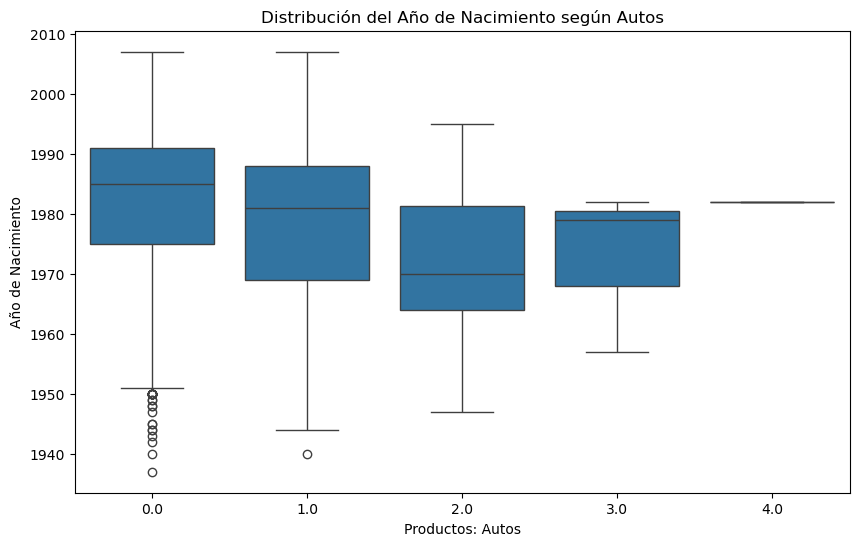

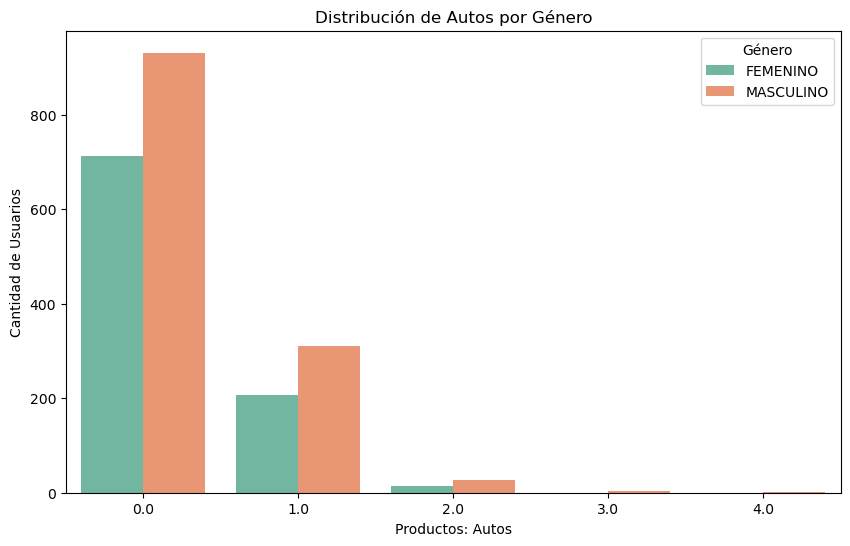

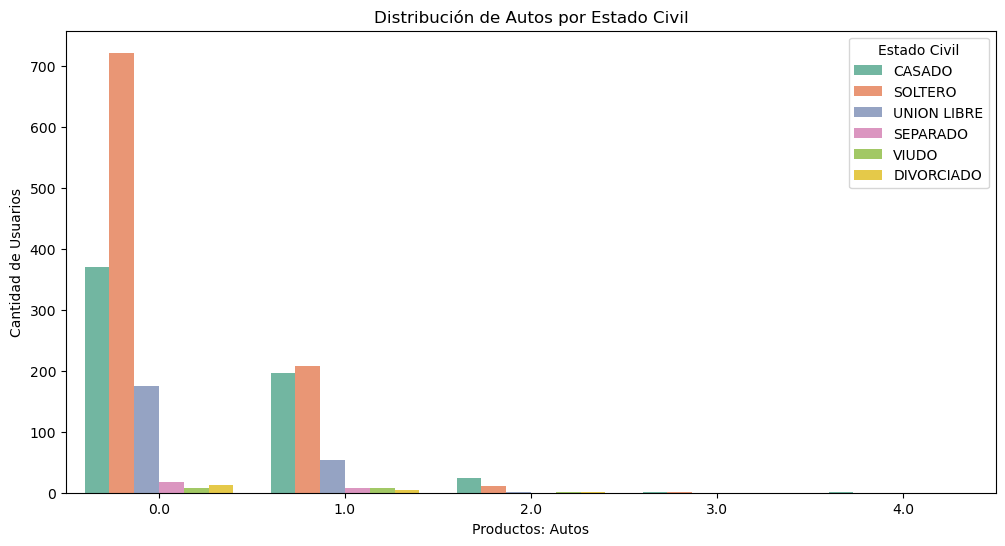

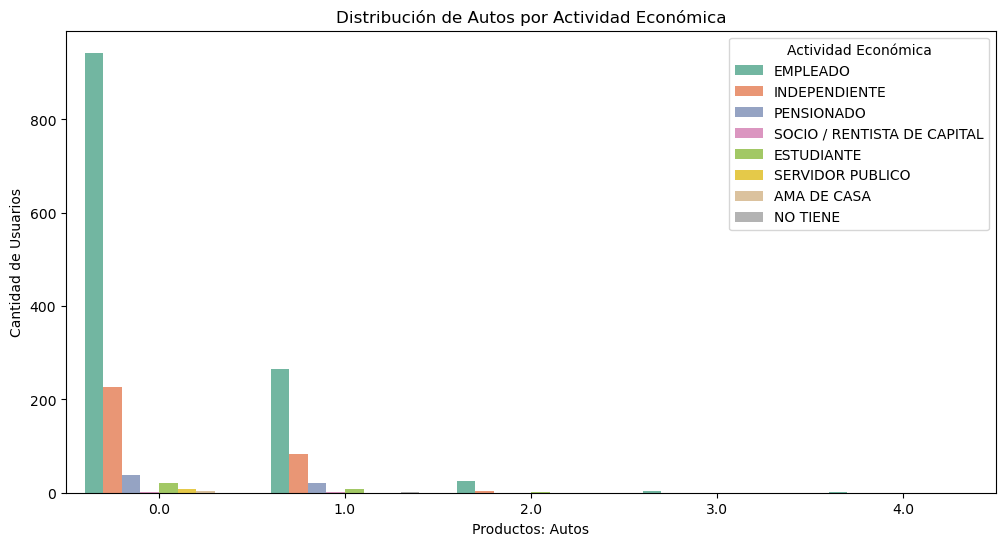

In [68]:
analizar_seguro("Autos")

Se identifica una **correlación ligera entre la edad y el número de productos contratados**, lo que sugiere que las personas de mayor edad tienden a contar con más servicios. Los **usuarios masculinos presentan en promedio una mayor cantidad de productos** en comparación con las mujeres. En cuanto al estado civil, todas las categorías muestran una tendencia similar, con la contratación predominante de **un producto de seguros**. Finalmente, con relación a la actividad ecónomica, la mayoría de usuarios se encuentran en las categorías de contratatar **un producto de seguros o no contratar ninguno**


<div class="alert alert-block alert-success">
<b>Datos Interacción</b> <a class=“tocSkip”></a>

</div>

In [71]:
df_int.shape

(17274, 6)

In [72]:
df_int.head()

,id,fecha_interaccion,interaccion,canal_interaccion,plataforma_interaccion,medio_interaccion
0,0,2022-03-23T00:00:00Z,survey,App Bolivar Conmigo,App Bolivar Conmigo,Correo
1,0,2022-03-23T00:00:00Z,registro,App Bolivar Conmigo,App Bolivar Conmigo,Correo
2,0,2022-08-18T12:00:00Z,Points,App Bolivar Conmigo,App Bolivar Conmigo,Correo
3,1,2022-08-09T00:00:00Z,registro,App Bolivar Conmigo,App Bolivar Conmigo,Correo
4,1,2022-08-26T00:00:00Z,survey,App Bolivar Conmigo,App Bolivar Conmigo,Correo


In [73]:
df_int.describe(include = "all")

,id,fecha_interaccion,interaccion,canal_interaccion,plataforma_interaccion,medio_interaccion
count,17274.000000,17274,17274,17274,17274,17274
unique,NaN,7915,11,3,3,2
top,NaN,2022-08-18T12:00:00Z,Workout,App Bolivar Conmigo,App Bolivar Conmigo,Correo
freq,NaN,1583,5718,14887,14887,17097
mean,1931.806298,NaN,NaN,NaN,NaN,NaN
std,2600.721761,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN
25%,546.000000,NaN,NaN,NaN,NaN,NaN
50%,1367.000000,NaN,NaN,NaN,NaN,NaN
75%,1917.000000,NaN,NaN,NaN,NaN,NaN


In [74]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17274 entries, 0 to 17273
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      17274 non-null  int64 
 1   fecha_interaccion       17274 non-null  object
 2   interaccion             17274 non-null  object
 3   canal_interaccion       17274 non-null  object
 4   plataforma_interaccion  17274 non-null  object
 5   medio_interaccion       17274 non-null  object
dtypes: int64(1), object(5)
memory usage: 809.8+ KB


In [75]:
# Filas duplicadas
df_int.duplicated().sum()

1536

In [76]:
df_int[df_int.duplicated(keep=False)].head(30)

,id,fecha_interaccion,interaccion,canal_interaccion,plataforma_interaccion,medio_interaccion
65,16,2022-08-18T12:00:00Z,Points,App Bolivar Conmigo,App Bolivar Conmigo,Correo
66,16,2022-08-18T12:00:00Z,Points,App Bolivar Conmigo,App Bolivar Conmigo,Correo
211,42,2022-09-07T21:12:44Z,Workout,App Bolivar Conmigo,App Bolivar Conmigo,Correo
212,42,2022-09-07T21:12:44Z,Workout,App Bolivar Conmigo,App Bolivar Conmigo,Correo
215,42,2022-09-09T21:55:24Z,Workout,App Bolivar Conmigo,App Bolivar Conmigo,Correo
216,42,2022-09-09T21:55:24Z,Workout,App Bolivar Conmigo,App Bolivar Conmigo,Correo
240,48,2022-08-18T12:00:00Z,Points,App Bolivar Conmigo,App Bolivar Conmigo,Correo
387,68,2021-12-14T11:59:36Z,Workout,App Bolivar Conmigo,App Bolivar Conmigo,Correo
388,68,2021-12-14T11:59:36Z,Workout,App Bolivar Conmigo,App Bolivar Conmigo,Correo
400,68,2022-01-21T01:07:33Z,Workout,App Bolivar Conmigo,App Bolivar Conmigo,Correo


In [77]:
# Eliminar duplicados considerando todas las columnas
df_int = df_int.drop_duplicates()

# Reajustar índices
df_int = df_int.reset_index(drop=True)

El dataset de interacciones contiene **17274 registros distribuidos en 6 columnas**, sin valores nulos. No obstante, se identificaron **1536 registros duplicados**, producto de un posible error en la carga de datos, ya que la misma interacción (fecha) aparece registrada varias veces. Para evitar sesgos en el análisis, se decidió **eliminar dichos duplicados**.


<span style="background-color: yellow; color: magenta; font-weight: bold;">
  fecha_interaccion
</span>

In [80]:
print(df_int["id"].min())
print(df_int["id"].max())

0
17189


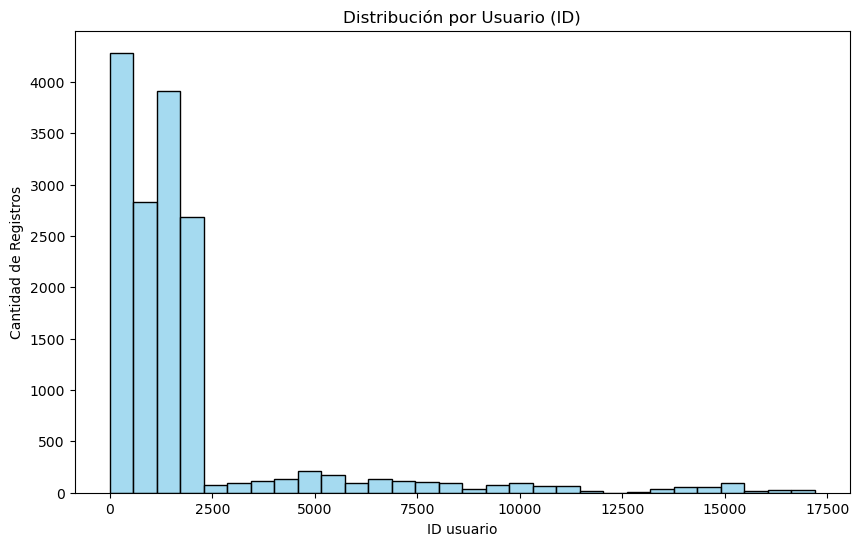

In [81]:
plt.figure(figsize=(10,6))
sns.histplot(df_int["id"], bins=30, kde=False, color="skyblue", edgecolor="black")

plt.title("Distribución por Usuario (ID)")
plt.xlabel("ID usuario")
plt.ylabel("Cantidad de Registros")
plt.show()

El dataset de interacciones incluye registros asociados a usuarios que no se encuentran en la base demográfica. Antes de aplicar cualquier depuración, resulta pertinente **revisar y analizar las demás columnas**, con el fin de comprender el alcance de la inconsistencia y determinar si se trata de un error de integración, diferencias en la fuente de datos o información válida que deba conservarse.


<span style="background-color: yellow; color: magenta; font-weight: bold;">
  fecha_interaccion
</span>

In [84]:
# Conversión de la columna a datetime
df_int["fecha_interaccion"] = pd.to_datetime(df_int["fecha_interaccion"], errors="coerce")

In [85]:
print(df_int["fecha_interaccion"].min())
print(df_int["fecha_interaccion"].max())

2020-12-10 00:00:00+00:00
2022-09-13 00:00:00+00:00


Los registros de interacción abarcan el período comprendido entre **diciembre de 2020 y septiembre de 2022**. Sin embargo, según la información oficial de la **Apple Store** y evidencias de comunicación corporativa, la aplicación estuvo disponible a partir de [**2022**](https://apps.apple.com/co/app/bol%C3%ADvar-conmigo/id1551406375), con un **lanzamiento formal en [julio del mismo año](https://youtu.be/P38J8o440LE)**. En consecuencia, se decidió **filtrar los datos para el año 2022**, asegurando la coherencia temporal del análisis.


In [87]:
df_int = df_int[df_int["fecha_interaccion"] >= "2022-01-01"]

print("Tamaño después del filtro:", df_int.shape)
print("Fecha mínima:", df_int["fecha_interaccion"].min())
print("Fecha máxima:", df_int["fecha_interaccion"].max())

Tamaño después del filtro: (14312, 6)
Fecha mínima: 2022-01-01 00:00:00+00:00
Fecha máxima: 2022-09-13 00:00:00+00:00


In [88]:
df_int["id"].sort_values().tail(20)

15717    16953
15719    16969
15720    16969
15721    17056
15722    17056
15723    17065
15724    17065
15726    17069
15725    17069
15727    17070
15728    17070
15729    17078
15730    17078
15731    17078
15732    17152
15733    17152
15734    17164
15735    17164
15736    17189
15737    17189
Name: id, dtype: int64

Aun después de aplicar el filtro temporal, persiste la **falta de concordancia entre los identificadores de usuario** en los dos datasets (demográfico e interacciones).


<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Canales, Plataformas y Medios de Interacción
</span>

In [91]:
df_int["canal_interaccion"].value_counts()

canal_interaccion
App Bolivar Conmigo    12120
Correo                  2015
CHATBOT                  177
Name: count, dtype: int64

In [92]:
df_int["plataforma_interaccion"].value_counts()

plataforma_interaccion
App Bolivar Conmigo    12120
Marketo                 2015
INFOBIP                  177
Name: count, dtype: int64

In [93]:
df_int["medio_interaccion"].value_counts()

medio_interaccion
Correo     14135
Celular      177
Name: count, dtype: int64

In [94]:
df_int = df_int[df_int["canal_interaccion"] == "App Bolivar Conmigo"]

print("Tamaño después del filtro:", df_int.shape)
print(df_int["canal_interaccion"].unique())

Tamaño después del filtro: (12120, 6)
['App Bolivar Conmigo']


In [95]:
df_int["plataforma_interaccion"].unique()

array(['App Bolivar Conmigo'], dtype=object)

In [96]:
df_int["medio_interaccion"].unique()

array(['Correo'], dtype=object)

In [97]:
df_int.drop(columns=["medio_interaccion"], inplace = True)

In [98]:
df_int

,id,fecha_interaccion,interaccion,canal_interaccion,plataforma_interaccion
0,0,2022-03-23 00:00:00+00:00,survey,App Bolivar Conmigo,App Bolivar Conmigo
1,0,2022-03-23 00:00:00+00:00,registro,App Bolivar Conmigo,App Bolivar Conmigo
2,0,2022-08-18 12:00:00+00:00,Points,App Bolivar Conmigo,App Bolivar Conmigo
3,1,2022-08-09 00:00:00+00:00,registro,App Bolivar Conmigo,App Bolivar Conmigo
4,1,2022-08-26 00:00:00+00:00,survey,App Bolivar Conmigo,App Bolivar Conmigo
...,...,...,...,...,...
15733,17152,2022-09-12 00:00:00+00:00,registro,App Bolivar Conmigo,App Bolivar Conmigo
15734,17164,2022-09-12 00:00:00+00:00,survey,App Bolivar Conmigo,App Bolivar Conmigo
15735,17164,2022-09-12 00:00:00+00:00,registro,App Bolivar Conmigo,App Bolivar Conmigo
15736,17189,2022-09-12 00:00:00+00:00,survey,App Bolivar Conmigo,App Bolivar Conmigo


Se identificaron interacciones que no corresponden directamente con la aplicación **Bolívar Conmigo**, como *correo* y *chatbot*. Dado que el estudio se centra exclusivamente en la app, se decidió **filtrar los datos para conservar únicamente las interacciones relacionadas con ella**. Asimismo, la columna **medio_interaccion** fue eliminada, ya que tras aplicar el filtro únicamente contenía el valor *Correo*, lo que la hace irrelevante para el análisis.


### Análisis de las Interracciónes

<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Información Huérfana
</span>

In [102]:
# Conjunto de IDs en cada dataset
ids_demo = set(df_demo["id"])
ids_inter = set(df_int["id"])

# IDs válidos: están en ambos datasets
ids_validos = ids_inter.intersection(ids_demo)

# IDs huérfanos: están en interacciones pero no en demográficos
ids_huerfanos = ids_inter.difference(ids_demo)

print("Usuarios totales en df_demo:", len(ids_demo))
print("Usuarios totales en df_int:", len(ids_inter))
print("Usuarios con datos válidos en ambos:", len(ids_validos))
print("Usuarios huérfanos (solo en interacciones):", len(ids_huerfanos))

# Ahora revisemos interacciones
inter_validos = df_int[df_int["id"].isin(ids_validos)]
inter_huerfanos = df_int[df_int["id"].isin(ids_huerfanos)]

print("\nInteracciones válidas:", inter_validos.shape[0])
print("Interacciones huérfanas:", inter_huerfanos.shape[0])

# Porcentajes
pct_usuarios_huerfanos = len(ids_huerfanos) / len(ids_inter) * 100
pct_interacciones_huerfanas = inter_huerfanos.shape[0] / df_int.shape[0] * 100

print(f"\n% de usuarios huérfanos: {pct_usuarios_huerfanos:.2f}%")
print(f"% de interacciones huérfanas: {pct_interacciones_huerfanas:.2f}%")


Usuarios totales en df_demo: 2764
Usuarios totales en df_int: 2438
Usuarios con datos válidos en ambos: 2239
Usuarios huérfanos (solo en interacciones): 199

Interacciones válidas: 11492
Interacciones huérfanas: 628

% de usuarios huérfanos: 8.16%
% de interacciones huérfanas: 5.18%


El cruce entre los dos datasets muestra un total de **2,764 usuarios en la base demográfica** y **2,421 en la de interacciones**, con **2,226 usuarios válidos en ambas**. Se identificaron **195 usuarios huérfanos** (presentes solo en interacciones) que concentran **611 registros**, equivalentes al **8.05% de los usuarios** y al **5.89% de las interacciones**.


<span style="background-color: yellow; color: magenta; font-weight: bold;">
  Interacciones
</span>

In [105]:
df_int["interaccion"].value_counts()

interaccion
Workout      4140
survey       2237
registro     2180
Points       1970
Inactivo      678
Goal          510
Challenge     310
Group          95
Name: count, dtype: int64

In [106]:
# Interacción huérfanos
df_int[df_int["id"].isin(ids_huerfanos)]["interaccion"].value_counts()

interaccion
registro     199
survey       183
Points       107
Workout       81
Goal          25
Challenge     20
Inactivo      13
Name: count, dtype: int64

In [107]:
# Interacción válidos
df_int[df_int["id"].isin(ids_validos)]["interaccion"].value_counts()

interaccion
Workout      4059
survey       2054
registro     1981
Points       1863
Inactivo      665
Goal          485
Challenge     290
Group          95
Name: count, dtype: int64

C:\Users\acast\AppData\Local\Temp\ipykernel_8180\1382160730.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_inactivos["mes"] = df_inactivos["fecha_interaccion"].dt.to_period("M")


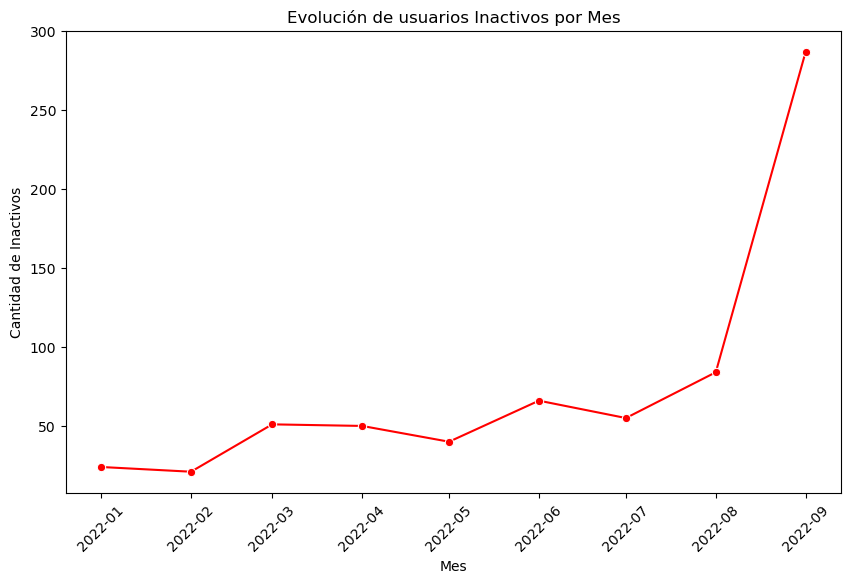

In [108]:
# Usuarios Inactivo en el tiempo


df_inactivos = df_int[df_int["interaccion"] == "Inactivo"].copy()

# Agrupar por mes
df_inactivos["mes"] = df_inactivos["fecha_interaccion"].dt.to_period("M")
conteo_inactivos = df_inactivos.groupby("mes").size().reset_index(name="cantidad")

# Convertir Period a datetime para graficar
conteo_inactivos["mes"] = conteo_inactivos["mes"].dt.to_timestamp()

# Gráfico de líneas
plt.figure(figsize=(10,6))
sns.lineplot(data=conteo_inactivos, x="mes", y="cantidad", marker="o", color="red")

plt.title("Evolución de usuarios Inactivos por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Inactivos")
plt.xticks(rotation=45)
plt.show()


C:\Users\acast\AppData\Local\Temp\ipykernel_8180\4185839373.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_activos["mes"] = df_activos["fecha_interaccion"].dt.to_period("M")


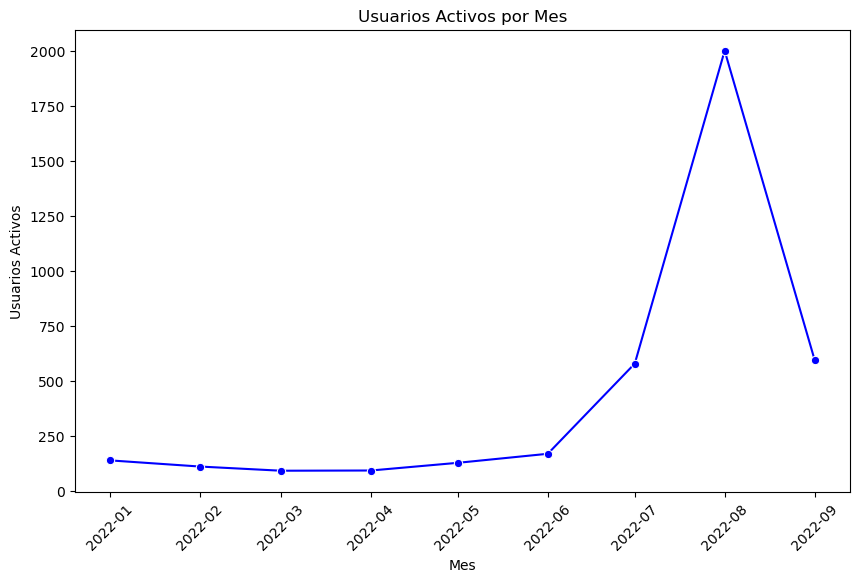

In [109]:
df_activos = df_int[df_int["interaccion"] != "Inactivo"].copy()

df_activos["mes"] = df_activos["fecha_interaccion"].dt.to_period("M")

# Contar usuarios únicos por mes
usuarios_activos_mes = (
    df_activos.groupby("mes")["id"]
    .nunique()
    .reset_index(name="usuarios_activos"))

# Convertir periodo a timestamp para graficar
usuarios_activos_mes["mes"] = usuarios_activos_mes["mes"].dt.to_timestamp()

# Gráfico de línea
plt.figure(figsize=(10,6))
sns.lineplot(data=usuarios_activos_mes, x="mes", y="usuarios_activos", marker="o", color="blue")

plt.title("Usuarios Activos por Mes")
plt.xlabel("Mes")
plt.ylabel("Usuarios Activos")
plt.xticks(rotation=45)
plt.show()

La cantidad de usuarios inactivos presenta un **incremento significativo a partir de agosto de 2022**, coincidiendo con los meses posteriores al lanzamiento oficial de la aplicación. Este comportamiento refleja un **problema relevante de retención**, posiblemente asociado a que los usuarios no perciben con claridad el propósito ni el valor agregado de la app más allá de sus interacciones iniciales.


C:\Users\acast\AppData\Local\Temp\ipykernel_8180\3478136514.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_int["mes"] = df_int["fecha_interaccion"].dt.to_period("M")


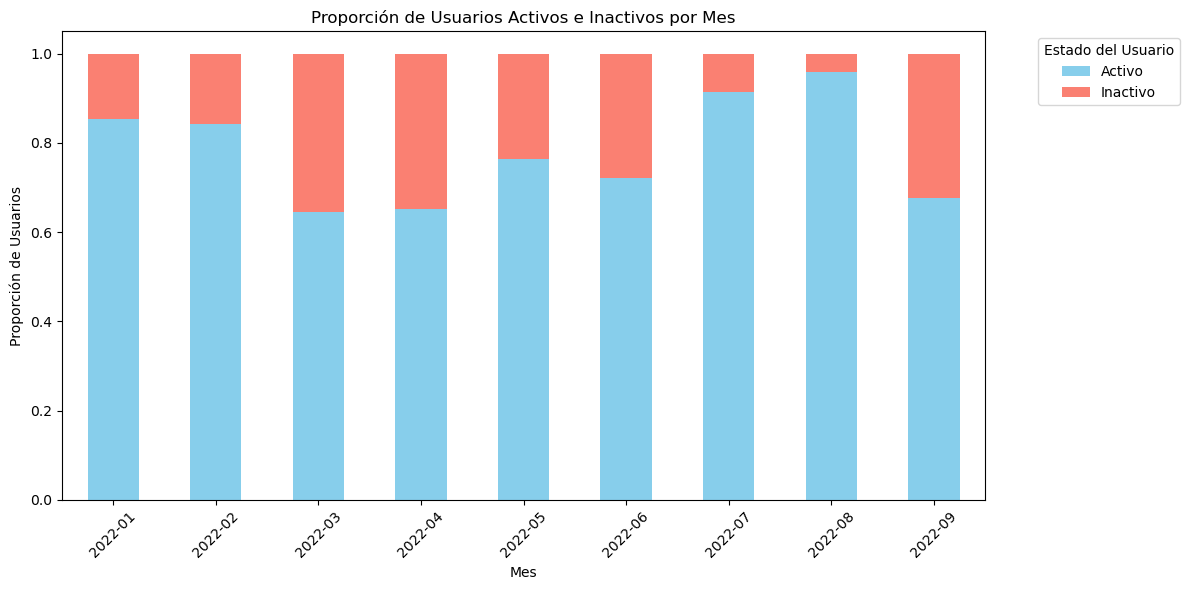

In [110]:
# 1. Marcar usuarios activos/inactivos
df_int["estado_usuario"] = np.where(df_int["interaccion"] == "Inactivo", "Inactivo", "Activo")

# 2. Crear columna mes (periodo mensual)
df_int["mes"] = df_int["fecha_interaccion"].dt.to_period("M")

# 3. Contar usuarios únicos por mes y estado
usuarios_mes = (
    df_int.groupby(["mes", "estado_usuario"])["id"]
    .nunique()
    .reset_index(name="usuarios")
)

# 4. Calcular proporciones por mes
total_mes = usuarios_mes.groupby("mes")["usuarios"].transform("sum")
usuarios_mes["proporcion"] = usuarios_mes["usuarios"] / total_mes

# 5. Pivot para stacked bar
prop_pivot = usuarios_mes.pivot(index="mes", columns="estado_usuario", values="proporcion")

# 6. Convertir a timestamp y formatear como "YYYY-MM"
prop_pivot.index = prop_pivot.index.to_timestamp().strftime('%Y-%m')

# 7. Gráfico de barras apiladas
ax = prop_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=["skyblue", "salmon"]
)

plt.title("Proporción de Usuarios Activos e Inactivos por Mes")
plt.xlabel("Mes")
plt.ylabel("Proporción de Usuarios")
plt.xticks(rotation=45)

# Leyenda afuera a la derecha
plt.legend(title="Estado del Usuario", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


La gráfica de proporción de usuarios activos e inactivos por mes muestra que en las primeras etapas de la aplicación la **inactividad alcanzaba cerca del 35%**, posiblemente porque aún no había sido lanzada de forma oficial. Con las campañas de comunicación y publicidad en julio y agosto de 2022, la proporción de usuarios activos mejoró notablemente; sin embargo, en **septiembre de 2022 la inactividad volvió a incrementarse hasta niveles cercanos al 40%**, lo que evidencia dificultades en la **retención y uso sostenido de la app a largo plazo**.


In [111]:
# Cantidad de días que el usuario usó la app


# Agrupar por usuario y calcular primera y última fecha
rango_uso = df_activos.groupby("id")["fecha_interaccion"].agg(["min", "max"]).reset_index()

# Calcular los días de uso (diferencia entre fechas)
rango_uso["dias_uso"] = (rango_uso["max"] - rango_uso["min"]).dt.days

# Unir al dataframe original
df_int = df_int.merge(rango_uso[["id", "dias_uso"]], on="id", how="left")

df_int.head()


,id,fecha_interaccion,interaccion,canal_interaccion,plataforma_interaccion,estado_usuario,mes,dias_uso
0,0,2022-03-23 00:00:00+00:00,survey,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-03,148.0
1,0,2022-03-23 00:00:00+00:00,registro,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-03,148.0
2,0,2022-08-18 12:00:00+00:00,Points,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-08,148.0
3,1,2022-08-09 00:00:00+00:00,registro,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-08,17.0
4,1,2022-08-26 00:00:00+00:00,survey,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-08,17.0


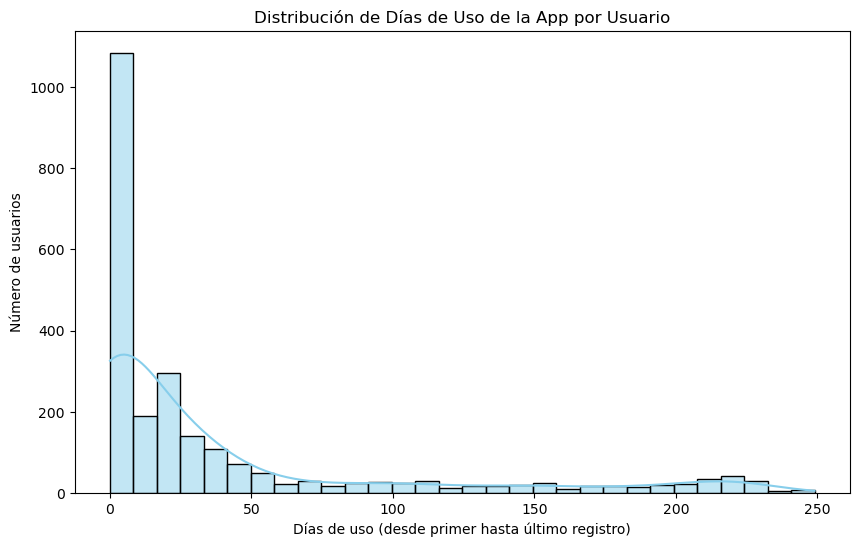

In [112]:
usuarios_dias = df_int.drop_duplicates(subset="id")[["id", "dias_uso"]]

plt.figure(figsize=(10,6))
sns.histplot(
    data=usuarios_dias,
    x="dias_uso",
    bins=30,
    kde=True,
    color="skyblue",
    edgecolor="black")

plt.title("Distribución de Días de Uso de la App por Usuario")
plt.xlabel("Días de uso (desde primer hasta último registro)")
plt.ylabel("Número de usuarios")
plt.show()

La gráfica muestra que la mayoría de los usuarios utiliza la aplicación únicamente durante **1 a 5 días**, tras lo cual el tiempo de uso cae de manera significativa. Esto sugiere un problema en los mecanismos de **reenganche y permanencia**, ya que la app no logra incentivar a los usuarios a regresar mediante notificaciones, tareas de valor agregado o funcionalidades que refuercen de manera clara su propósito y beneficios.


C:\Users\acast\AppData\Local\Temp\ipykernel_8180\1006999917.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ultimas_df, x="ultima_interaccion", palette="Set2", order=orden)


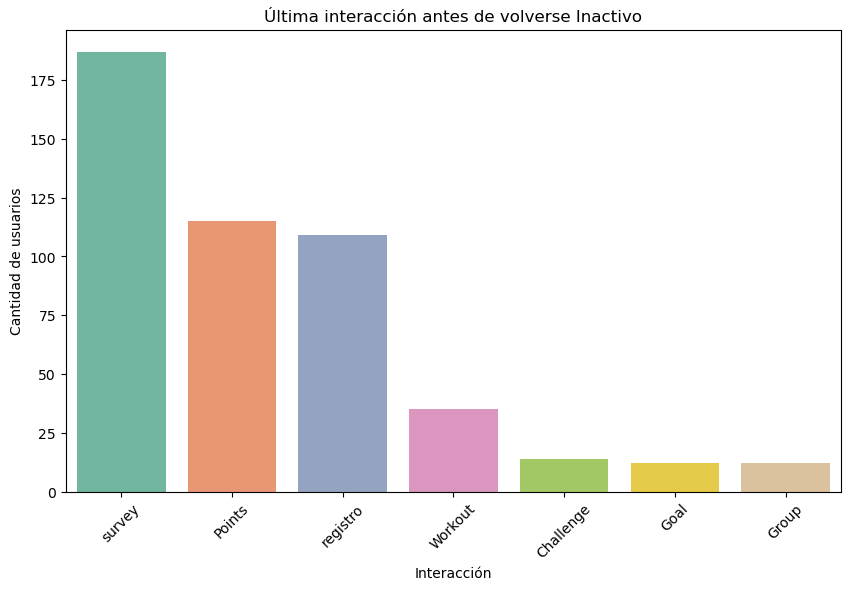

In [113]:
#Filtrar usuarios con al menos un "Inactivo"
usuarios_inactivos = df_int[df_int["interaccion"] == "Inactivo"]["id"].unique()
df_con_inactivos = df_int[df_int["id"].isin(usuarios_inactivos)].copy()

# Ordenar por usuario y fecha
df_con_inactivos = df_con_inactivos.sort_values(by=["id", "fecha_interaccion"])

# Extraer la última interacción antes de volverse inactivo
ultimas = []
for uid, grupo in df_con_inactivos.groupby("id"):
    grupo = grupo.sort_values("fecha_interaccion").reset_index(drop=True)
    if "Inactivo" in grupo["interaccion"].values:
        idx_inactivo = grupo[grupo["interaccion"] == "Inactivo"].index[0]
        if idx_inactivo > 0:  
            ultimas.append(grupo.loc[idx_inactivo - 1, "interaccion"])

# Crear DataFrame para graficar
ultimas_df = pd.DataFrame(ultimas, columns=["ultima_interaccion"])


# Graficar con countplot
plt.figure(figsize=(10,6))
orden = ultimas_df["ultima_interaccion"].value_counts().index
sns.countplot(data=ultimas_df, x="ultima_interaccion", palette="Set2", order=orden)

plt.title("Última interacción antes de volverse Inactivo")
plt.xlabel("Interacción")
plt.ylabel("Cantidad de usuarios")
plt.xticks(rotation=45)
plt.show()


El análisis de la última interacción antes de la inactividad muestra que la mayoría de usuarios abandona la aplicación tras completar el **registro o el survey**, lo que sugiere que estas etapas pueden resultar extensas, complejas o poco claras en cuanto al valor que ofrece la app. Este comportamiento indica que, una vez superados estos pasos iniciales, los usuarios no encuentran suficientes incentivos para continuar. Aunque la aplicación cuenta con un sistema de puntos que recompensa ciertas tareas, este mecanismo parece insuficiente para **fomentar el reenganche**. Se requiere fortalecer la propuesta de valor y generar dinámicas que motiven a los usuarios a seguir utilizando la app de manera constante en función de su bienestar.


C:\Users\acast\AppData\Local\Temp\ipykernel_8180\2732850213.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


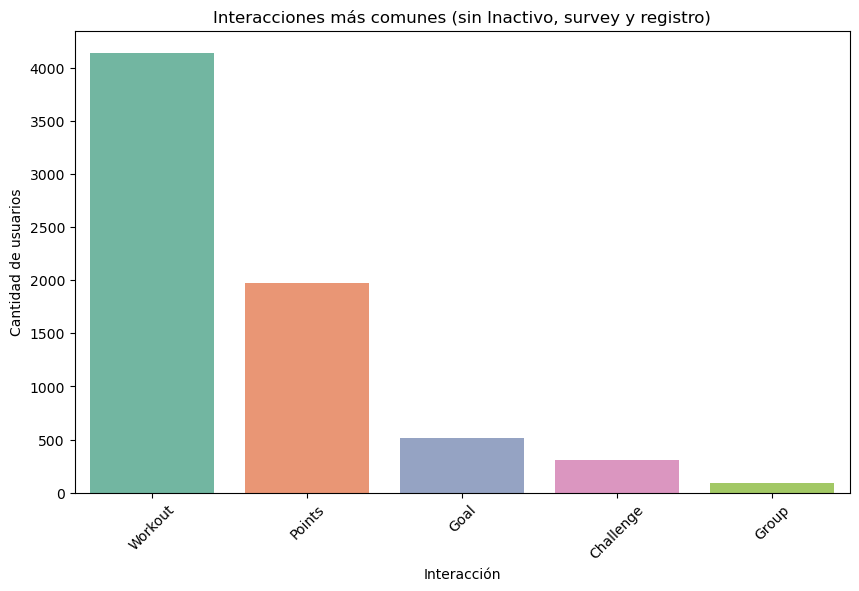

In [114]:
# Filtrar dataset excluyendo interacciones no deseadas
df_filtrado = df_int[~df_int["interaccion"].isin(["Inactivo", "survey", "registro"])]

# Countplot ordenado por frecuencia
orden = df_filtrado["interaccion"].value_counts().index

plt.figure(figsize=(10,6))
sns.countplot(
    data=df_filtrado,
    x="interaccion",
    order=orden,
    palette="Set2")

plt.title("Interacciones más comunes (sin Inactivo, survey y registro)")
plt.xlabel("Interacción")
plt.ylabel("Cantidad de usuarios")
plt.xticks(rotation=45)
plt.show()

El análisis de las interacciones más frecuentes, excluyendo encuestas y registros, muestra que el apartado de **workout o entrenamiento** concentra la mayor actividad de los usuarios. Esto evidencia que, tras el registro, los usuarios comprenden la importancia de los entrenamientos, pero no logran articular de manera clara esta funcionalidad con otros apartados de la app como *Goal*, *Challenge* o *Group*, que presentan muy baja participación. Dado que la propuesta central de la aplicación busca crear un **ecosistema integral de bienestar** que combine entrenamientos, retos, interacción social y acumulación de puntos, resulta clave **reforzar la conexión entre el módulo de entrenamiento y las demás funcionalidades**, promoviendo un uso constante, fluido y atractivo para los usuarios.


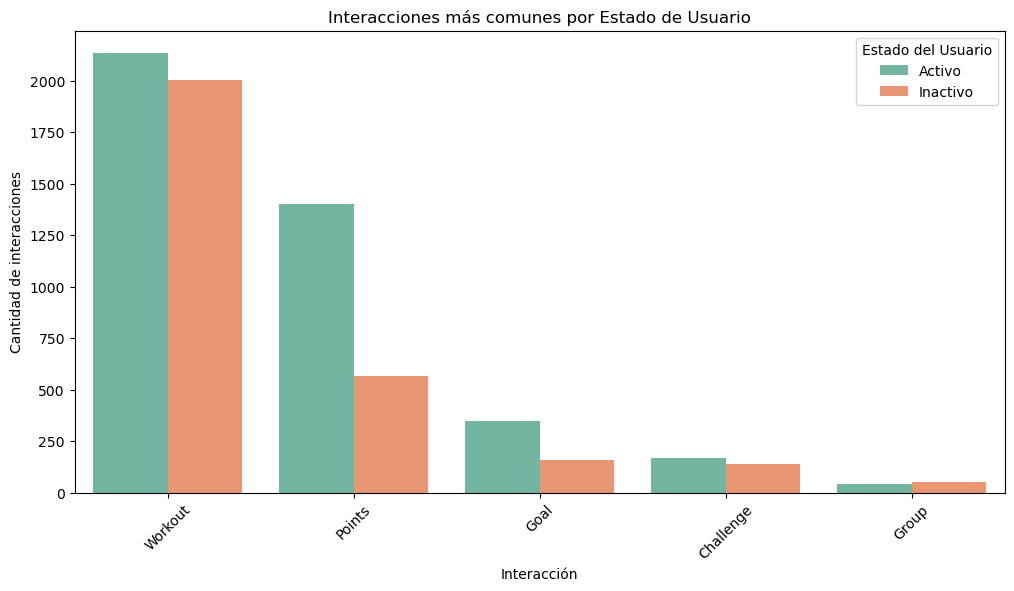

In [115]:
# Identificar usuarios inactivos
usuarios_inactivos = df_int[df_int["interaccion"] == "Inactivo"]["id"].unique()

# Crear nueva columna "estado_usuario"
df_int["estado_usuario"] = np.where(df_int["id"].isin(usuarios_inactivos), "Inactivo", "Activo")


# Filtrar dataset excluyendo interacciones no deseadas
df_filtrado = df_int[~df_int["interaccion"].isin(["Inactivo", "survey", "registro"])]

# Ordenar interacciones por frecuencia
orden = df_filtrado["interaccion"].value_counts().index

# Countplot con hue=estado_usuario
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_filtrado,
    x="interaccion",
    order=orden,
    hue="estado_usuario",
    palette="Set2"
)

plt.title("Interacciones más comunes por Estado de Usuario")
plt.xlabel("Interacción")
plt.ylabel("Cantidad de interacciones")
plt.xticks(rotation=45)
plt.legend(title="Estado del Usuario")
plt.show()

<div class="alert alert-block alert-success">
<b>Unir Dataset</b> <a class=“tocSkip”></a>

</div>

In [117]:
df_full = pd.merge(df_demo, df_int, on="id", how="left")

print("Tamaño join:", df_full.shape)

# Vista previa
df_full.head()

Tamaño join: (12017, 19)


,id,Genero,Fec_Nacimiento,Estad_Civil,Ingresos,Act_Economica,Num_Hijos,prod_seguros,Salud,Vida,Autos,Ano_Nacimiento,fecha_interaccion,interaccion,canal_interaccion,plataforma_interaccion,estado_usuario,mes,dias_uso
0,0,FEMENINO,1975-03-18 00:00:00+00:00,CASADO,7964819.0,EMPLEADO,<NA>,1,0,0,0.0,1975,2022-03-23 00:00:00+00:00,survey,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-03,148.0
1,0,FEMENINO,1975-03-18 00:00:00+00:00,CASADO,7964819.0,EMPLEADO,<NA>,1,0,0,0.0,1975,2022-03-23 00:00:00+00:00,registro,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-03,148.0
2,0,FEMENINO,1975-03-18 00:00:00+00:00,CASADO,7964819.0,EMPLEADO,<NA>,1,0,0,0.0,1975,2022-08-18 12:00:00+00:00,Points,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-08,148.0
3,1,MASCULINO,1982-08-30 00:00:00+00:00,CASADO,3911901.0,ESTUDIANTE,3,2,0,0,1.0,1982,2022-08-09 00:00:00+00:00,registro,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-08,17.0
4,1,MASCULINO,1982-08-30 00:00:00+00:00,CASADO,3911901.0,ESTUDIANTE,3,2,0,0,1.0,1982,2022-08-26 00:00:00+00:00,survey,App Bolivar Conmigo,App Bolivar Conmigo,Activo,2022-08,17.0


In [118]:
# Calcular Edad

# Primera Fecha de Interacción
primera_interaccion = df_int.groupby("id")["fecha_interaccion"].min().reset_index()
primera_interaccion.rename(columns={"fecha_interaccion": "Primera_Interaccion"}, inplace=True)

#Unir con df_demo
df_full = df_full.merge(primera_interaccion, on="id", how="left")

# Calcular edad en años
df_full["Edad"] = (
    (df_full["Primera_Interaccion"] - df_full["Fec_Nacimiento"])
    .dt.days // 365
)

# Verificar
print(df_full[["id", "Fec_Nacimiento", "Primera_Interaccion", "Edad"]].head(10))

   id            Fec_Nacimiento       Primera_Interaccion  Edad
0   0 1975-03-18 00:00:00+00:00 2022-03-23 00:00:00+00:00  47.0
1   0 1975-03-18 00:00:00+00:00 2022-03-23 00:00:00+00:00  47.0
2   0 1975-03-18 00:00:00+00:00 2022-03-23 00:00:00+00:00  47.0
3   1 1982-08-30 00:00:00+00:00 2022-08-09 00:00:00+00:00  39.0
4   1 1982-08-30 00:00:00+00:00 2022-08-09 00:00:00+00:00  39.0
5   2 1984-12-31 00:00:00+00:00 2022-09-09 00:00:00+00:00  37.0
6   2 1984-12-31 00:00:00+00:00 2022-09-09 00:00:00+00:00  37.0
7   3 1972-11-30 00:00:00+00:00 2022-08-28 00:00:00+00:00  49.0
8   3 1972-11-30 00:00:00+00:00 2022-08-28 00:00:00+00:00  49.0
9   4 1961-12-10 00:00:00+00:00 2022-08-16 00:00:00+00:00  60.0


In [119]:
print(df_full["Act_Economica"].value_counts(dropna=False))

Act_Economica
EMPLEADO                       8328
NaN                            2303
INDEPENDIENTE                  1052
PENSIONADO                      218
ESTUDIANTE                       73
SERVIDOR PUBLICO                 25
AMA DE CASA                       9
SOCIO / RENTISTA DE CAPITAL       6
NO TIENE                          3
Name: count, dtype: int64


In [120]:
# Definir categorías poco frecuentes
categorias_pequenas = ["SERVIDOR PUBLICO", "AMA DE CASA", "SOCIO / RENTISTA DE CAPITAL", "NO TIENE"]

# Crear columna limpia
df_full["Act_Economica_Limpia"] = df_full["Act_Economica"].fillna("SIN INFO")

# Reemplazar categorías poco frecuentes por "OTROS"
df_full["Act_Economica_Limpia"] = df_full["Act_Economica_Limpia"].replace(categorias_pequenas, "OTROS")

# Verificar distribución
print(df_full["Act_Economica_Limpia"].value_counts())


Act_Economica_Limpia
EMPLEADO         8328
SIN INFO         2303
INDEPENDIENTE    1052
PENSIONADO        218
ESTUDIANTE         73
OTROS              43
Name: count, dtype: int64


In [121]:
def stacked_bar_estado_usuario(columna):
    """
    Genera un gráfico de barras apiladas con proporciones (%) de Activos/Inactivos,
    ordenadas de mayor a menor proporción de Activos.

    Parámetros:
    columna (str): nombre de la columna categórica (ej. 'Genero', 'Estad_Civil', 'Act_Economica')
    """
    # Agrupación y cálculo de proporciones
    prop = (
        df_full.groupby([columna, "estado_usuario"])
        .size()
        .reset_index(name="conteo")
    )
    prop["proporcion"] = prop.groupby(columna)["conteo"].transform(lambda x: x / x.sum())

    # Pivot para stacked bar
    prop_pivot = prop.pivot(index=columna, columns="estado_usuario", values="proporcion")

    # Ordenar por proporción de Activos (si existe la columna)
    if "Activo" in prop_pivot.columns:
        prop_pivot = prop_pivot.sort_values(by="Activo", ascending=False)

    # Gráfico de barras apiladas
    ax = prop_pivot.plot(
        kind="barh",
        stacked=True,
        figsize=(10,6),
        color=["skyblue", "salmon"]
    )

    plt.title(f"Proporción de Estado de Usuario según {columna}")
    plt.xlabel("Proporción (%)")
    plt.ylabel(columna)
    plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


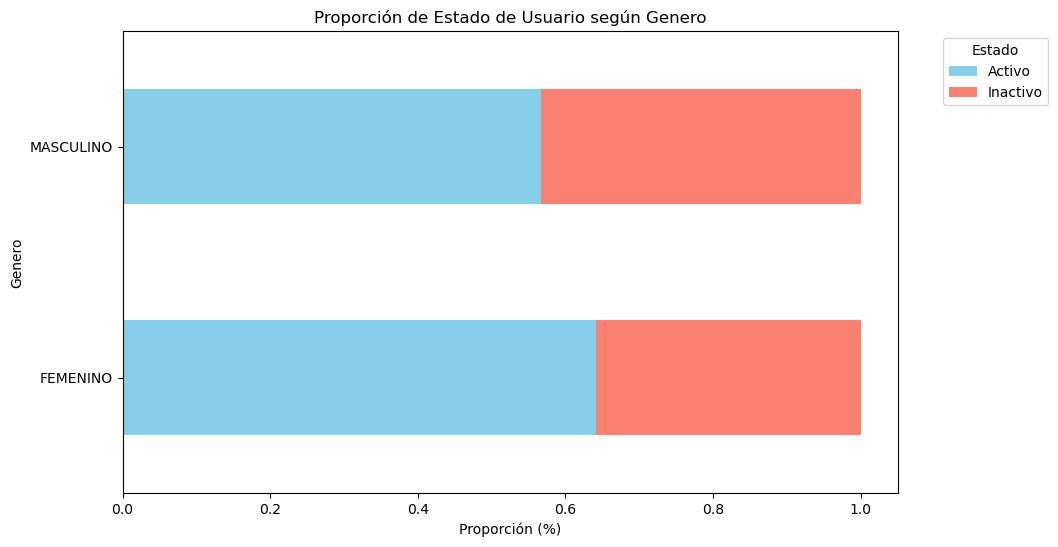

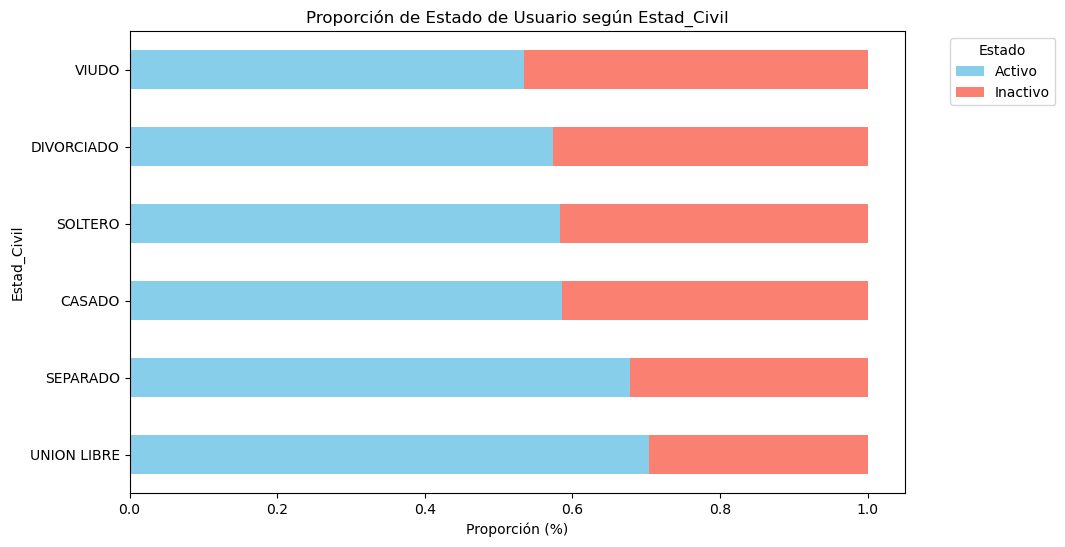

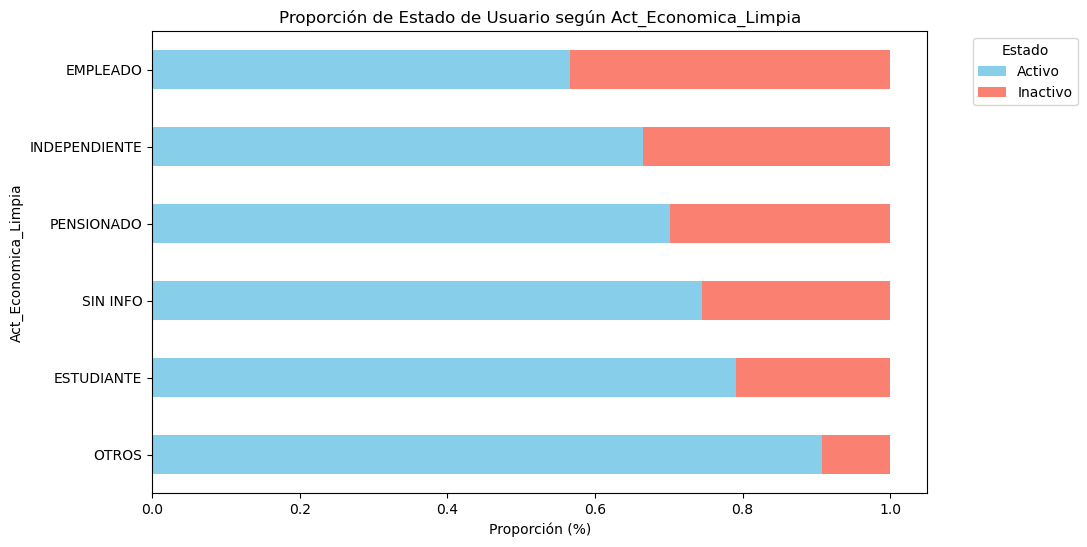

In [122]:
stacked_bar_estado_usuario("Genero")
stacked_bar_estado_usuario("Estad_Civil")
stacked_bar_estado_usuario("Act_Economica_Limpia")

El análisis de la proporción de usuarios activos e inactivos por categorías revela que la **inactividad es más frecuente en el género masculino**, lo cual representa una oportunidad para diseñar estrategias específicas que atiendan sus necesidades, sin dejar de lado las dinámicas valoradas por las mujeres. En cuanto al estado civil, los niveles de inactividad son mayores en **solteros, viudos y divorciados**, aunque no se evidencia una relación clara entre esta variable y la retención, por lo que su efecto puede considerarse marginal. Por otro lado, se observa que los **empleados e independientes presentan una alta tasa de inactividad**, probablemente asociada a limitaciones de tiempo para actividades de bienestar. En este sentido, se recomienda adaptar la aplicación para ofrecer experiencias más flexibles, con notificaciones y contenidos relevantes en horarios fuera de la jornada laboral, fines de semana o en la noche, facilitando así su uso en función de las necesidades de este segmento.


In [123]:
def proporciones_estado(df, columna):
    """
    Calcula la proporción de Activos/Inactivos por cada categoría de la columna indicada.
    
    Parámetros:
    columna (str): nombre de la columna categórica (ej. 'Genero', 'Estad_Civil', 'Act_Economica')
    
    Retorna:
    DataFrame con proporciones
    """
    # Conteo de usuarios por columna y estado
    tabla = (
        df.groupby([columna, "estado_usuario"])
        .size()
        .reset_index(name="conteo")
    )
    
    # Calcular proporción dentro de cada categoría
    tabla["proporcion"] = tabla.groupby(columna)["conteo"].transform(lambda x: x / x.sum())
    
    return tabla


prop_genero = proporciones_estado(df_full, "Genero")
prop_estad_civil = proporciones_estado(df_full, "Estad_Civil")
prop_act_eco = proporciones_estado(df_full, "Act_Economica")

print("Proporciones por Género:\n", prop_genero.head(20))
print("\nProporciones por Estado Civil:\n", prop_estad_civil.head(20))
print("\nProporciones por Actividad Económica:\n", prop_act_eco.head(20))


Proporciones por Género:
       Genero estado_usuario  conteo  proporcion
0   FEMENINO         Activo    3696    0.641110
1   FEMENINO       Inactivo    2069    0.358890
2  MASCULINO         Activo    3155    0.566936
3  MASCULINO       Inactivo    2410    0.433064

Proporciones por Estado Civil:
     Estad_Civil estado_usuario  conteo  proporcion
0        CASADO         Activo    1719    0.586489
1        CASADO       Inactivo    1212    0.413511
2    DIVORCIADO         Activo      39    0.573529
3    DIVORCIADO       Inactivo      29    0.426471
4      SEPARADO         Activo      57    0.678571
5      SEPARADO       Inactivo      27    0.321429
6       SOLTERO         Activo    3257    0.583483
7       SOLTERO       Inactivo    2325    0.416517
8   UNION LIBRE         Activo     784    0.703770
9   UNION LIBRE       Inactivo     330    0.296230
10        VIUDO         Activo      39    0.534247
11        VIUDO       Inactivo      34    0.465753

Proporciones por Actividad Económica:

In [124]:
def countplot_estado_usuario_num(columna):
    """
    Genera un countplot horizontal para columnas numéricas enteras 
    (Num_Hijos, prod_seguros, Salud, Vida, Autos),
    mostrando la distribución según estado_usuario.
    
    Parámetros:
    columna (str): nombre de la columna numérica
    """
    
    # Ordenar los valores únicos de la columna (de menor a mayor)
    orden = sorted(df_full[columna].dropna().unique())
    
    plt.figure(figsize=(10,6))
    sns.countplot(
        data=df_full,
        y=columna,
        hue="estado_usuario",
        order=orden,
        palette="Set2"
    )
    
    plt.title(f"Distribución de {columna} según Estado de Usuario")
    plt.ylabel(columna)
    plt.xlabel("Cantidad de Usuarios")
    plt.legend(title="Estado", loc="lower right")
    plt.show()

In [125]:
def stacked_bar_estado_usuario_num(columna):
    """
    Genera un gráfico de barras apiladas con proporciones (%) de Activos/Inactivos
    para columnas numéricas enteras (Num_Hijos, prod_seguros, Salud, Vida, Autos).
    
    Parámetros:
    columna (str): nombre de la columna numérica
    """
    # Agrupación y cálculo de proporciones
    prop = (
        df_full.groupby([columna, "estado_usuario"])
        .size()
        .reset_index(name="conteo")
    )
    prop["proporcion"] = prop.groupby(columna)["conteo"].transform(lambda x: x / x.sum())

    # Pivot para stacked bar
    prop_pivot = prop.pivot(index=columna, columns="estado_usuario", values="proporcion")

    # Gráfico de barras apiladas
    ax = prop_pivot.plot(
        kind="barh",               # horizontal
        stacked=True,
        figsize=(10,6),
        color=["skyblue", "salmon"]
    )

    plt.title(f"Proporción de Estado de Usuario según {columna}")
    plt.xlabel("Proporción (%)")
    plt.ylabel(columna)

    # Leyenda fuera a la derecha
    plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


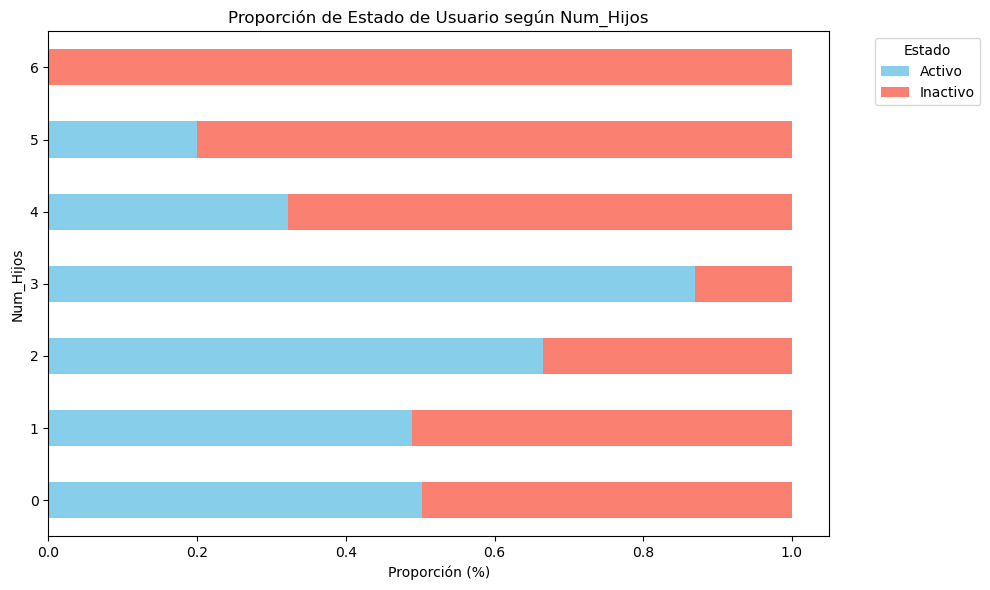

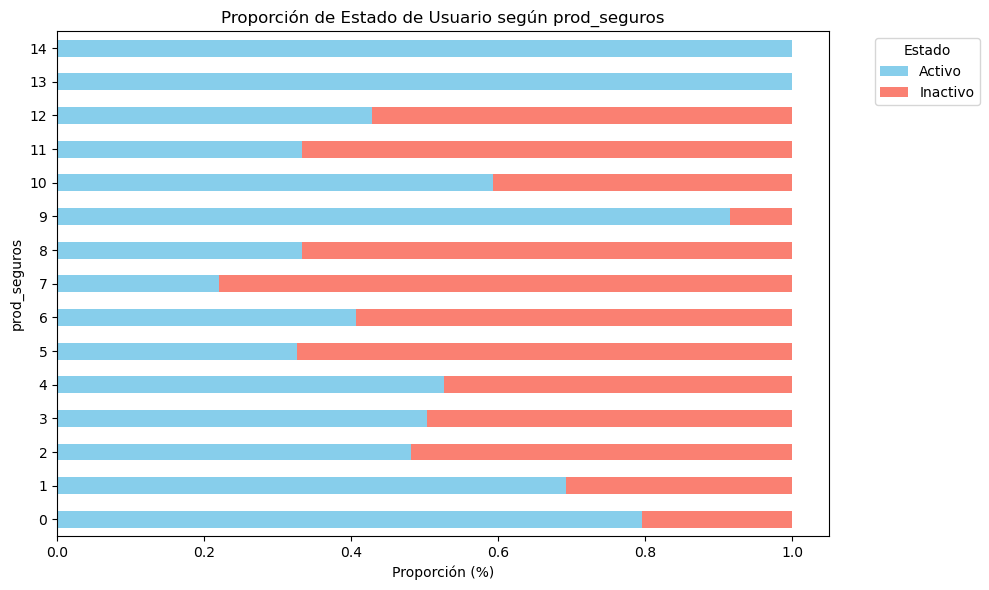

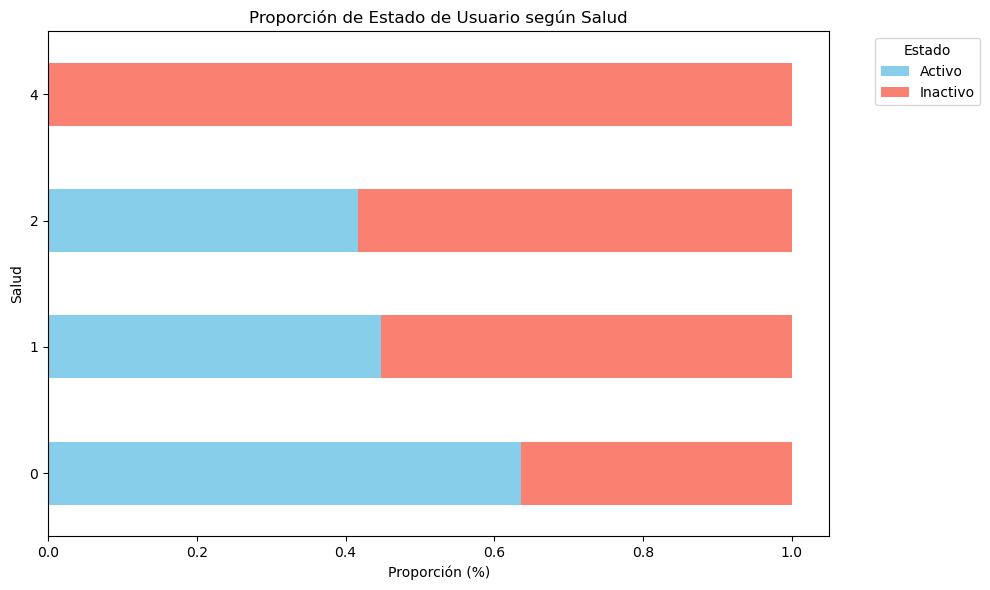

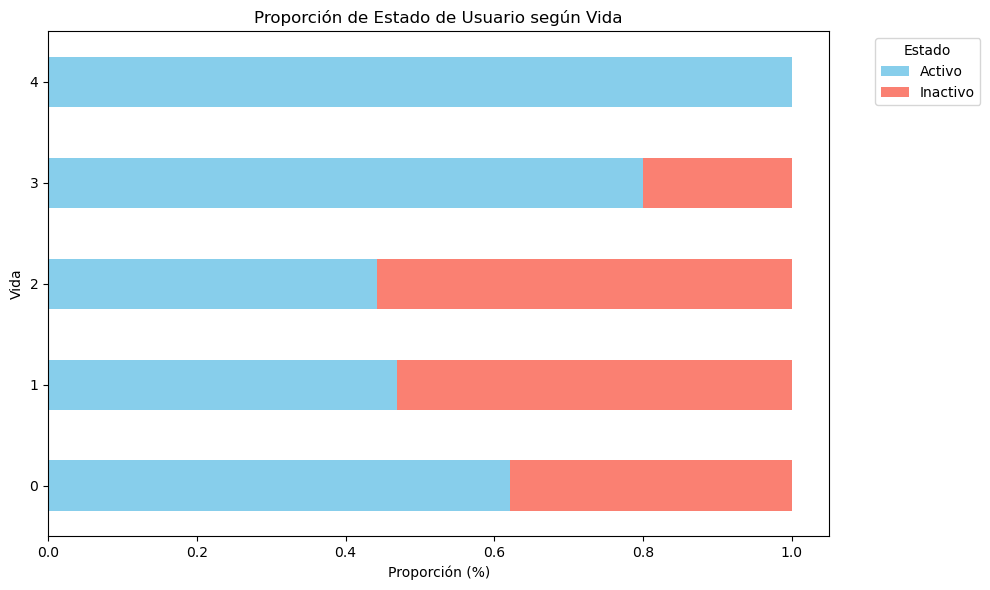

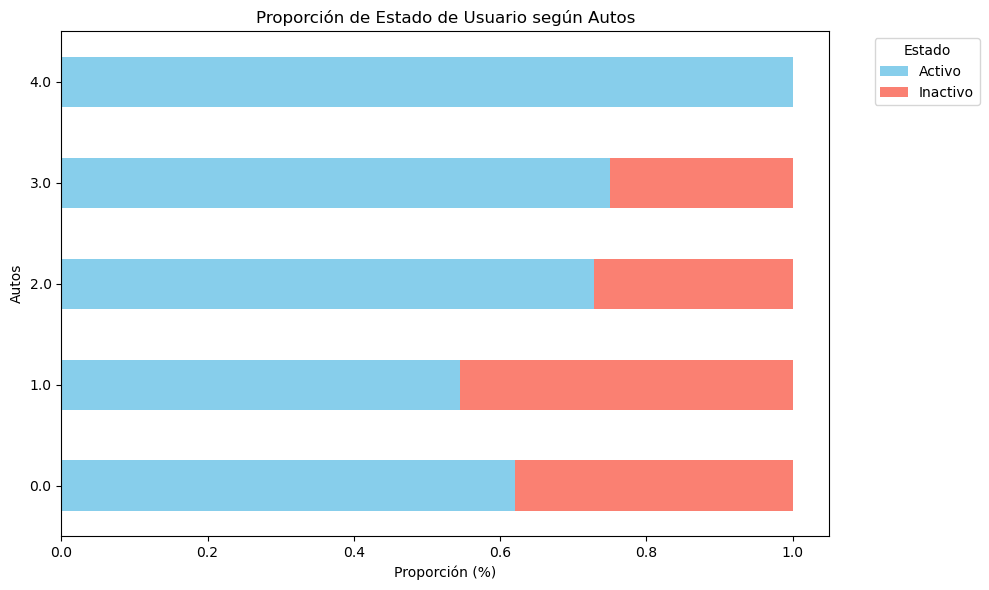

In [126]:
stacked_bar_estado_usuario_num("Num_Hijos")
stacked_bar_estado_usuario_num("prod_seguros")
stacked_bar_estado_usuario_num("Salud")
stacked_bar_estado_usuario_num("Vida")
stacked_bar_estado_usuario_num("Autos")


Las gráficas muestran que los **usuarios con mayor número de hijos (4, 5 o 6) presentan una probabilidad más alta de inactividad**, lo que puede estar asociado a la fuerte demanda de tiempo que implica el cuidado familiar. Esto plantea la necesidad de **integrar dinámicas familiares dentro de la app**, de modo que no sea percibida como una herramienta de uso individual, sino como un entorno de bienestar compartido. Asimismo, se observa que a medida que aumenta el **número de productos de seguros contratados**, la probabilidad de inactividad también se incrementa, lo que sugiere que los usuarios no identifican con claridad el valor de la aplicación en la gestión de seguros. En este sentido, resulta clave **reforzar la centralización y comunicación del portafolio de productos dentro de la app**, integrando de forma más clara la propuesta de bienestar con los servicios aseguradores ofrecidos por Seguros Bolívar.


In [127]:
def proporciones_estado(df, columna):
    """
    Calcula la proporción de Activos/Inactivos por cada categoría de la columna indicada.
    
    Parámetros:
    df (DataFrame): dataset de entrada
    columna (str): nombre de la columna (categórica o numérica entera)
    
    Retorna:
    DataFrame con proporciones
    """
    # Convertir a categoría si es numérica
    if pd.api.types.is_numeric_dtype(df[columna]):
        df_temp = df.copy()
        df_temp[columna] = df_temp[columna].astype("Int64")  # mantiene enteros con NaN
    else:
        df_temp = df.copy()
    
    # Conteo de usuarios por columna y estado
    tabla = (
        df_temp.groupby([columna, "estado_usuario"])
        .size()
        .reset_index(name="conteo")
    )
    
    # Calcular proporción dentro de cada categoría
    tabla["proporcion"] = tabla.groupby(columna)["conteo"].transform(lambda x: x / x.sum())
    
    return tabla


# Ejemplos de uso
prop_num_hijos = proporciones_estado(df_full, "Num_Hijos")
prop_prod_seguros = proporciones_estado(df_full, "prod_seguros")
prop_salud = proporciones_estado(df_full, "Salud")
prop_vida = proporciones_estado(df_full, "Vida")
prop_autos = proporciones_estado(df_full, "Autos")

print("Proporciones por Número de Hijos:\n", prop_num_hijos.head(20))
print("\nProporciones por Productos de Seguros:\n", prop_prod_seguros.head(10))
print("\nProporciones por Salud:\n", prop_salud.head(10))
print("\nProporciones por Vida:\n", prop_vida.head(10))
print("\nProporciones por Autos:\n", prop_autos.head(10))


Proporciones por Número de Hijos:
     Num_Hijos estado_usuario  conteo  proporcion
0           0         Activo    2333    0.502044
1           0       Inactivo    2314    0.497956
2           1         Activo     327    0.489521
3           1       Inactivo     341    0.510479
4           2         Activo     452    0.665685
5           2       Inactivo     227    0.334315
6           3         Activo     180    0.869565
7           3       Inactivo      27    0.130435
8           4         Activo      10    0.322581
9           4       Inactivo      21    0.677419
10          5         Activo       2    0.200000
11          5       Inactivo       8    0.800000
12          6       Inactivo       4    1.000000

Proporciones por Productos de Seguros:
    prod_seguros estado_usuario  conteo  proporcion
0             0         Activo    1614    0.795466
1             0       Inactivo     415    0.204534
2             1         Activo    3150    0.692460
3             1       Inactivo    

C:\Users\acast\AppData\Local\Temp\ipykernel_8180\1826081274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_full, x="estado_usuario", y="Ingresos", palette="Set2")


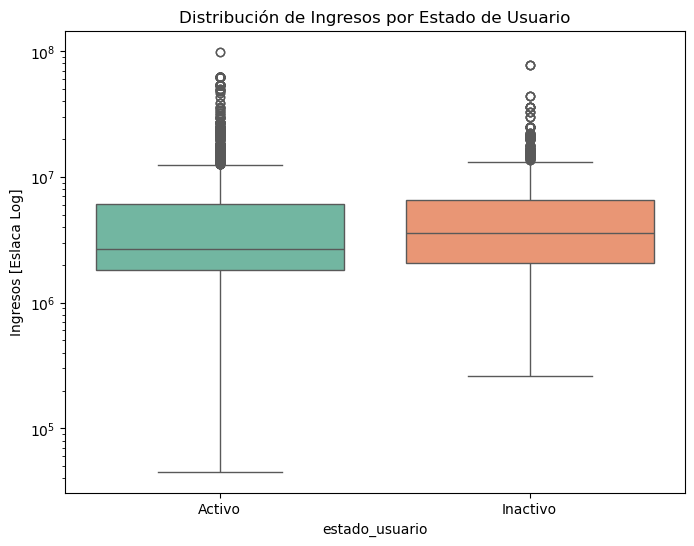

In [128]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_full, x="estado_usuario", y="Ingresos", palette="Set2")
plt.yscale("log")  # por si hay outliers grandes
plt.title("Distribución de Ingresos por Estado de Usuario")
plt.ylabel("Ingresos [Eslaca Log]")
plt.show()

In [129]:
resumen_ingresos = df_full.groupby("estado_usuario")["Ingresos"].describe()
print(resumen_ingresos)

                 count          mean           std       min        25%  \
estado_usuario                                                            
Activo          6772.0  5.818277e+06  9.024981e+06   45342.0  1803000.0   
Inactivo        4418.0  5.610786e+06  5.714655e+06  260106.0  2074000.0   

                      50%        75%         max  
estado_usuario                                    
Activo          2672164.0  6070443.0  99000000.0  
Inactivo        3605000.0  6500000.0  78000000.0  


In [130]:
activos = df_full[df_full["estado_usuario"]=="Activo"]["Ingresos"].dropna()
inactivos = df_full[df_full["estado_usuario"]=="Inactivo"]["Ingresos"].dropna()

stat, pval = ttest_ind(activos, inactivos, equal_var=False)
print(f"t-stat={stat:.3f}, p-value={pval:.3f}")
    
alpha = 0.05
    
if pval < alpha:
    print("Existe evidencia estadísticamente significativa de que los ingresos difieren entre Activos e Inactivos.")
else:
    print("No se encontró evidencia suficiente para afirmar que los ingresos difieren entre Activos e Inactivos.")

t-stat=1.489, p-value=0.137
No se encontró evidencia suficiente para afirmar que los ingresos difieren entre Activos e Inactivos.


El análisis de ingresos muestra que **no existe una diferencia significativa entre usuarios activos e inactivos**, lo que indica que el nivel de ingresos **no influye en la permanencia ni en la probabilidad de abandono de la aplicación**.


C:\Users\acast\AppData\Local\Temp\ipykernel_8180\1739523847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_full, x="estado_usuario", y="Edad", palette="Set2")


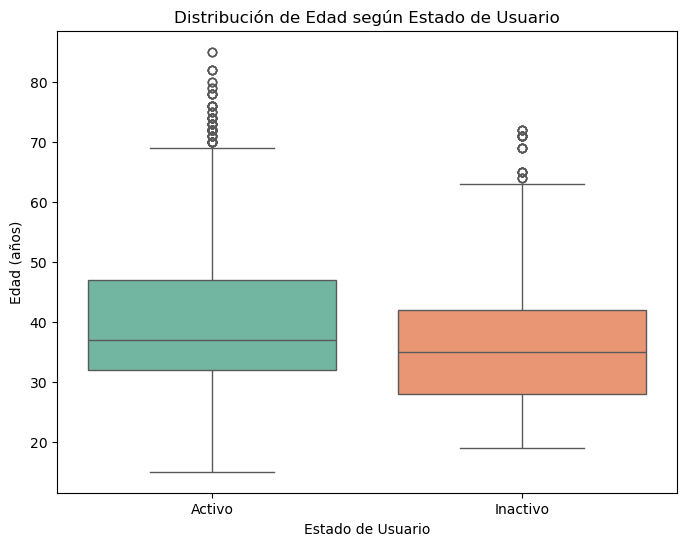

In [131]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_full, x="estado_usuario", y="Edad", palette="Set2")
plt.title("Distribución de Edad según Estado de Usuario")
plt.xlabel("Estado de Usuario")
plt.ylabel("Edad (años)")
plt.show()

In [132]:
resumen_edad = df_full.groupby("estado_usuario")["Edad"].describe()
print(resumen_edad)

                 count       mean        std   min   25%   50%   75%   max
estado_usuario                                                            
Activo          6853.0  40.126660  11.376357  15.0  32.0  37.0  47.0  85.0
Inactivo        4469.0  36.513538  10.035060  19.0  28.0  35.0  42.0  72.0


In [133]:
activos = df_full[df_full["estado_usuario"]=="Activo"]["Edad"].dropna()
inactivos = df_full[df_full["estado_usuario"]=="Inactivo"]["Edad"].dropna()

stat, pval = ttest_ind(activos, inactivos, equal_var=False)
print(f"t-stat={stat:.3f}, p-value={pval:.3f}")
    
alpha = 0.05
    
if pval < alpha:
    print("Existe evidencia estadísticamente significativa de que la edad difiere entre Activos e Inactivos.")
else:
    print("No se encontró evidencia suficiente para afirmar que los edad difiere entre Activos e Inactivos.")

t-stat=17.753, p-value=0.000
Existe evidencia estadísticamente significativa de que la edad difiere entre Activos e Inactivos.


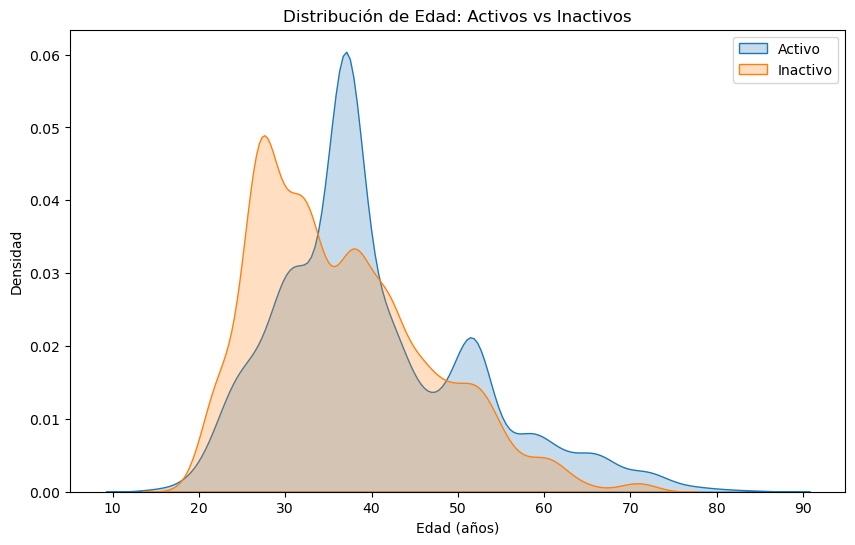

In [134]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_full[df_full["estado_usuario"]=="Activo"], x="Edad", label="Activo", fill=True)
sns.kdeplot(data=df_full[df_full["estado_usuario"]=="Inactivo"], x="Edad", label="Inactivo", fill=True)
plt.title("Distribución de Edad: Activos vs Inactivos")
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.legend()
plt.show()


In [135]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]
df_full["Grupo_Edad"] = pd.cut(df_full["Edad"], bins=bins, labels=labels, right=False)

prop_grupo = (
    df_full.groupby(["Grupo_Edad", "estado_usuario"])
    .size()
    .reset_index(name="conteo")
)

prop_grupo["proporcion"] = prop_grupo.groupby("Grupo_Edad")["conteo"].transform(lambda x: x / x.sum())
print(prop_grupo)


   Grupo_Edad estado_usuario  conteo  proporcion
0         <20         Activo      28    0.875000
1         <20       Inactivo       4    0.125000
2       20-29         Activo     973    0.415457
3       20-29       Inactivo    1369    0.584543
4       30-39         Activo    3132    0.662857
5       30-39       Inactivo    1593    0.337143
6       40-49         Activo    1249    0.561096
7       40-49       Inactivo     977    0.438904
8       50-59         Activo     979    0.705840
9       50-59       Inactivo     408    0.294160
10        60+         Activo     492    0.806557
11        60+       Inactivo     118    0.193443


C:\Users\acast\AppData\Local\Temp\ipykernel_8180\1976720419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_full.groupby(["Grupo_Edad", "estado_usuario"])
C:\Users\acast\AppData\Local\Temp\ipykernel_8180\1976720419.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_grupo["proporcion"] = prop_grupo.groupby("Grupo_Edad")["conteo"].transform(lambda x: x / x.sum())


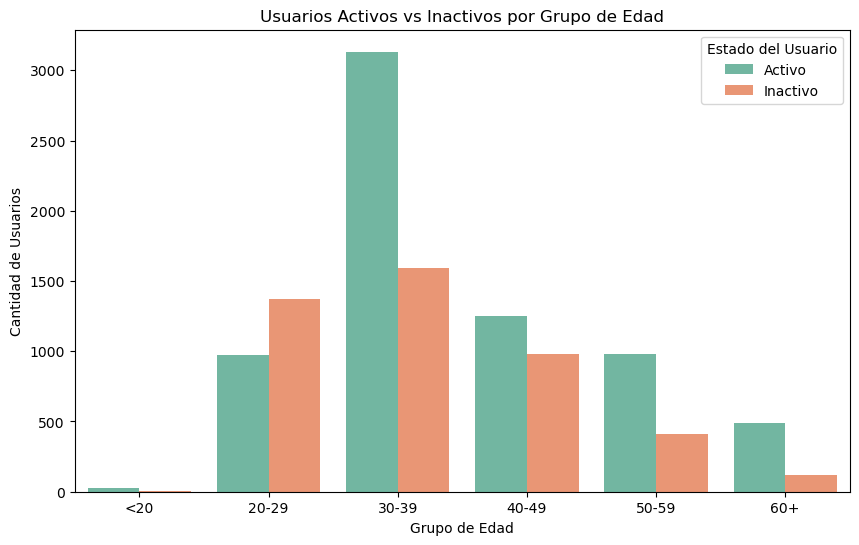

In [136]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df_full,
    x="Grupo_Edad",
    hue="estado_usuario",
    palette="Set2"
)

plt.title("Usuarios Activos vs Inactivos por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Usuarios")
plt.legend(title="Estado del Usuario")
plt.show()


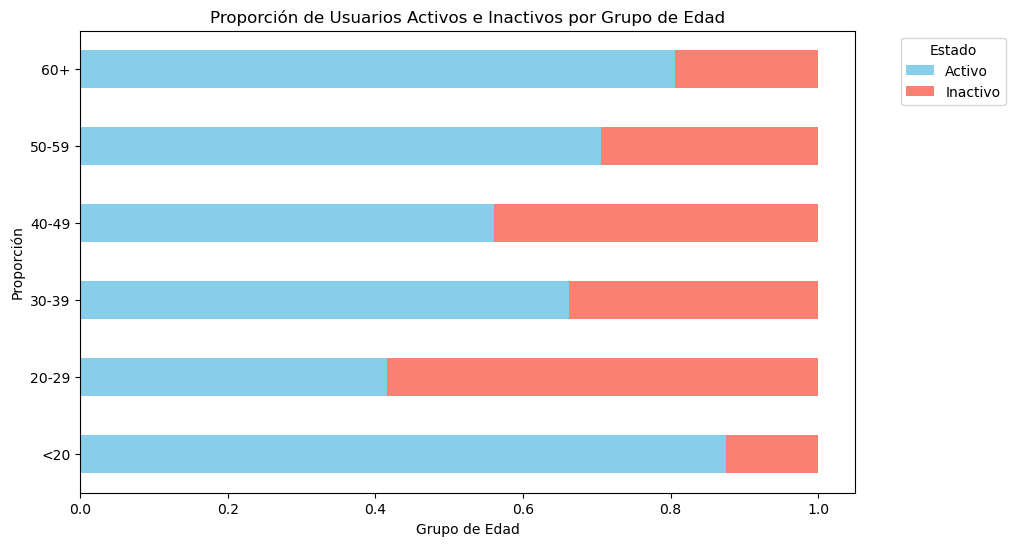

In [137]:
# Pivot para tener proporciones en columnas
prop_pivot = prop_grupo.pivot(index="Grupo_Edad", columns="estado_usuario", values="proporcion")

# Gráfico de barras apiladas
prop_pivot.plot(
    kind="barh",
    stacked=True,
    figsize=(10,6),
    color=["skyblue", "salmon"]
)

plt.title("Proporción de Usuarios Activos e Inactivos por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Proporción")
plt.legend(title="Estado del Usuario")
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


El análisis por edad evidencia que los **usuarios inactivos tienden a ser más jóvenes**, principalmente entre los **20 y 35 años**, en contraste con los que permanecen activos en la aplicación. Este patrón se alinea con la observación de que los **empleados e independientes**, que suelen encontrarse en este rango de edad, presentan mayores niveles de inactividad debido a las demandas de estudio y trabajo propias de esta etapa productiva. Esto representa una **oportunidad estratégica para rediseñar la experiencia y el sistema de incentivos** —notificaciones, retos, puntos y dinámicas de interacción— orientándolos a captar y retener este segmento, que constituye un grupo amplio y de alto potencial para la aplicación.


In [138]:
# Copia del dataset
df_model = df_full.copy()

# 1. Variable dependiente
df_model["estado_bin"] = df_model["estado_usuario"].map({"Activo": 1, "Inactivo": 0})

# 2. Variables independientes (incluyendo Act_Economica)
X = df_model[["Edad", "Ingresos", "Genero", "Estad_Civil", "Num_Hijos", "prod_seguros", "Act_Economica_Limpia"]].copy()

# 3. Log-transformar ingresos
X["Ingresos"] = X["Ingresos"].apply(lambda x: np.log1p(x) if pd.notnull(x) else x)

# 4. Crear variables dummies para categóricas
X = pd.get_dummies(X, columns=["Genero", "Estad_Civil", "Act_Economica_Limpia"], drop_first=True)

# 5. Unir con la variable dependiente y eliminar nulos
df_model_final = pd.concat([X, df_model["estado_bin"]], axis=1).dropna()

# 6. Definir X e y
X_final = df_model_final.drop(columns=["estado_bin"])
y_final = df_model_final["estado_bin"]

# 7. Asegurar todo numérico
X_final = X_final.astype(float)

# 8. Añadir constante
X_final = sm.add_constant(X_final)

# 9. Ajustar modelo logístico
modelo_multi_acteco = sm.Logit(y_final, X_final).fit()

print(modelo_multi_acteco.summary())


Optimization terminated successfully.
         Current function value: 0.601499
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             estado_bin   No. Observations:                 6135
Model:                          Logit   Df Residuals:                     6119
Method:                           MLE   Df Model:                           15
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                  0.1305
Time:                        16:50:04   Log-Likelihood:                -3690.2
converged:                       True   LL-Null:                       -4244.3
Covariance Type:            nonrobust   LLR p-value:                8.672e-227
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.8891      0.620    

In [139]:
def odds_ratios(modelo):
    """
    Convierte coeficientes de un modelo Logit de statsmodels en odds ratios
    con intervalos de confianza al 95%.
    """
    params = modelo.params
    conf = modelo.conf_int()
    conf['OR'] = params
    conf.columns = ['2.5%', '97.5%', 'coef']
    
    # Calcular odds ratios
    OR = np.exp(conf)
    OR = OR[['coef', '2.5%', '97.5%']]
    OR = OR.rename(columns={'coef': 'Odds Ratio', '2.5%': 'IC 2.5%', '97.5%': 'IC 97.5%'})
    
    return OR.round(3)

# Obtener tabla de odds ratios
tabla_or = odds_ratios(modelo_multi_acteco)
print(tabla_or)


                                    Odds Ratio  IC 2.5%  IC 97.5%
const                                    0.411    0.122     1.386
Edad                                     1.105    1.096     1.114
Ingresos                                 0.850    0.782     0.924
Num_Hijos                                1.075    0.986     1.172
prod_seguros                             0.852    0.829     0.875
Genero_MASCULINO                         0.596    0.524     0.679
Estad_Civil_DIVORCIADO                   0.584    0.308     1.107
Estad_Civil_SEPARADO                     0.647    0.283     1.479
Estad_Civil_SOLTERO                      1.367    1.178     1.585
Estad_Civil_UNION LIBRE                  2.791    2.287     3.406
Estad_Civil_VIUDO                        0.096    0.048     0.191
Act_Economica_Limpia_ESTUDIANTE          4.025    1.578    10.262
Act_Economica_Limpia_INDEPENDIENTE       0.791    0.601     1.041
Act_Economica_Limpia_OTROS               1.083    0.311     3.768
Act_Econom

In [140]:
# Generar tabla de odds ratios con intervalos de confianza
tabla_or = odds_ratios(modelo_multi_acteco)

# Resaltar según si OR > 1 (positivo) o < 1 (negativo)
def color_odds(val):
    if val > 1:
        return 'color: green; font-weight: bold;'
    elif val < 1:
        return 'color: red; font-weight: bold;'
    return ''

styled_tabla = (
    tabla_or.style
    .applymap(color_odds, subset=["Odds Ratio"])
    .set_caption("Odds Ratios con Intervalos de Confianza (95%)")
    .format(precision=3)
    .background_gradient(cmap="Blues", axis=0, subset=["Odds Ratio"])
)
styled_tabla


C:\Users\acast\AppData\Local\Temp\ipykernel_8180\2316939910.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_odds, subset=["Odds Ratio"])


,Odds Ratio,IC 2.5%,IC 97.5%
const,0.411,0.122,1.386
Edad,1.105,1.096,1.114
Ingresos,0.850,0.782,0.924
Num_Hijos,1.075,0.986,1.172
prod_seguros,0.852,0.829,0.875
Genero_MASCULINO,0.596,0.524,0.679
Estad_Civil_DIVORCIADO,0.584,0.308,1.107
Estad_Civil_SEPARADO,0.647,0.283,1.479
Estad_Civil_SOLTERO,1.367,1.178,1.585
Estad_Civil_UNION LIBRE,2.791,2.287,3.406


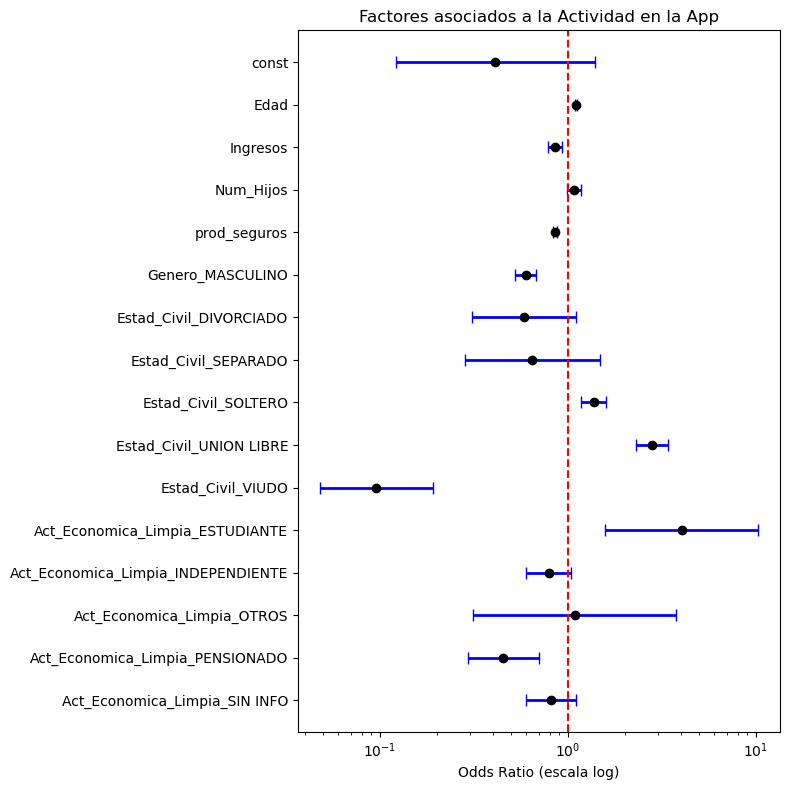

In [141]:
def forest_plot(modelo, titulo="Forest Plot - Odds Ratios"):
    # Extraer coeficientes y CIs
    params = modelo.params
    conf = modelo.conf_int()
    conf['OR'] = params
    conf.columns = ['2.5%', '97.5%', 'coef']
    
    # Calcular OR y sus IC
    OR = np.exp(conf)
    OR = OR[['coef', '2.5%', '97.5%']]
    OR = OR.rename(columns={'coef': 'Odds Ratio', '2.5%': 'IC 2.5%', '97.5%': 'IC 97.5%'})
    
    # Orden inverso para mostrar arriba-abajo
    OR = OR[::-1]
    
    # Gráfico
    plt.figure(figsize=(8, len(OR)*0.5))
    plt.errorbar(
        OR["Odds Ratio"], OR.index,
        xerr=[OR["Odds Ratio"] - OR["IC 2.5%"], OR["IC 97.5%"] - OR["Odds Ratio"]],
        fmt='o', color='black', ecolor='blue', elinewidth=2, capsize=4
    )
    
    # Línea de referencia en OR=1
    plt.axvline(x=1, color='red', linestyle='--')
    
    plt.title(titulo)
    plt.xlabel("Odds Ratio (escala log)")
    plt.xscale("log")  # escala logarítmica para OR
    plt.tight_layout()
    plt.show()

# Uso con tu modelo
forest_plot(modelo_multi_acteco, titulo="Factores asociados a la Actividad en la App")


En síntesis, el análisis revela que la **inactividad se concentra principalmente en las etapas de Survey y Registro**, lo que indica posibles fricciones en el proceso inicial. El **género masculino** muestra una mayor propensión a volverse inactivo, al igual que los **usuarios empleados**, probablemente debido a limitaciones de tiempo. Asimismo, los clientes con **más de un producto de seguros contratado** tienden a presentar mayor inactividad, lo que sugiere falta de claridad en la integración de estos servicios dentro de la app. Finalmente, el grupo etario con mayor incidencia de abandono corresponde a los **20 a 29 años**, segmento estratégico que requiere mecanismos de reenganche más efectivos.
